In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

sns.set_style('white')

# Project 2 - Model results

* Model 1: Color layer + gray layer (histeq)*
* Model 2: Color layer + gray layer (clahe, cv2.createCLAHE(clipLimit=10.0, tileGridSize=(3,3))
* Model 3: model 2 lowering clipLimit to 2
* Model 4: model 2 lowering clipLimit to 1*

CONCLUSION: GRAY USE + histeq
* Model 5: color (channel histeq) + gray (histeq)-> great loss of accuracy by applying color hist
* Model 6: color converted to YUV, histeq Y channel, return to RGB + gray(histeq)
* Model 7: color (channel clahe) + gray (histeq)
* Model 8: color converted to YUV, clahe Y channel, return to RGB + gray(histeq): PERFORMS HORRENDOUSLY!!!

CONCLUSION: MODELS 5, 6,7,8 DO NOT IMPROVE ACCURACY

* Model 9: color normalized (std1), gray (histeq)
* Model 10: color normalized (std1), gray(no transformed)

CONCLUSION: better gray without transformation, color normalized

* Model 11: color normalized 1, gray normalized 1
* Model 12: color normalized 5, gray normalized 5
* Model 13: color normalized 5, gray normalized 5, w incremented sigma from 0.1 to 0.2

CONCLUSION: smaller sigma initializes worse. Normalize to 5 is ok.
KEEP color normalized 5, gray normalized 5, sigma 0.1

* Model 14: change of layer1 activation function to tanh
* Model 15: change of layer1, layer2 activation function to tanh
* Model 16: change of layer1, layer2, layer3 activation function to tanh
* Model 17: change of layer1, layer2, layer3, layer4 activation function to tanh

CONCLUSION: activation functions tanh for all layers

* Model 18: ly3_dropout added
* Model 19: ly4_dropout added
* Model 21: ly4_dropout added change of layer4 to relu6

* Model 20: ly4_dropout as activation function in layer3 (replace tanh)

CONCLUSION: IF DROPOUT, USE AS EXTRA AT LAYER 4. Investigate again when increasing epoch (change keep_proba parameter)
NO DROPOUT
* Model 22:  change of layer4 to elu
* Model 23: change of layer1, layer2, layer3, layer4 activation function to sigmoid
* Model 24: change of layer3, layer4 activation function to sigmoid
* Model 25: change of layer4 activation function to sigmoid

CONCLUSION: BETTER TANH
* Model 26: replay of model 17
* Model 27: increase of dataset by vertical flipping symetric signs (increased 35% train dataset on this trial)
* Model 28: increase of dataset by moving image 2 pixels right + 2 pixels down
* Model 29: model 28 + dropout

CONCLUSION: USE ORIGINAL DATASET
* Model 30: learning 0.0005, epochs 60
* Model 31: dropout, learning 0.0005, epochs 60
* Model 32: learning 0.0001, epochs 60
* Model 33: learning 0.0002, epochs 60
* Model 34: learning 0.001, epochs 60
* Model 35: learning 0.001, epochs 50

* Model 36: repeticion 35
* Model 37: repeticion 35
* Model 38: repeticion 35

CHANGE ARCHITECTURE
* Model 39:
        layer_2 = {'in': [14,14,6], 'out':[12,12,16], 'filter':[3,3,6], 
                   'strides': [1, 1, 1, 1],  'padd':'VALID'}     
        ly2_max = {'in':[12,12,16], 'out':[6,6,16], 'ksize':[1,2,2,1], 
                   'strides': [1, 2, 2, 1],  'padd':'SAME'} 
        layer_3 = {'in':576, 'out':120}
* Model 40:
  model 39, learning rate 0.0007
  EPOCH 80
  save model asa '40-seleccionado'
  
* Model 41: 40 + dropout
                                     
* Model 42:replay, modified architecture
* Model 43: 42 without dropout, learning rate 0.007 
        layer_2 = {'in': [14,14,6], 'out':[12,12,16], 'filter':[3,3,6], 
                   'strides': [1, 1, 1, 1],  'padd':'VALID'} #'padd':[0,0]

        ly2_max = {'in':[12,12,16], 'out':[6,6,16], 'ksize':[1,2,2,1], 
                   'strides': [1, 2, 2, 1],  'padd':'SAME'} #'padd':[0,0]

        layer_3 = {'in':576, 'out':120}
                                     
                                     
* Model 44: changed architecture
        layer_2 = {'in': [14,14,6], 'out':[10,10,16], 'filter':[5,5,6], 
                   'strides': [1, 1, 1, 1],  'padd':'VALID'} #'padd':[0,0]

        ly2_max = {'in':[10,10,16], 'out':[5,5,16], 'ksize':[1,2,2,1], 
                   'strides': [1, 2, 2, 1],  'padd':'SAME'} #'padd':[0,0]

        layer_3 = {'in':400, 'out':120}
                                
                                     
SELECTED MODEL: MODEL '100'                         

In [16]:
def add_model_to_plot(df,model, alpha=0.9, linewidth=1.5):
    ax1.plot(df.val_acc, label='model'+str(model).zfill(0)+'_acc', linewidth = linewidth, alpha=alpha)
    ax2.plot(df.val_loss, label='model'+str(model).zfill(0)+'_loss', linestyle='dashed', linewidth = linewidth, alpha=alpha)    

In [95]:
model={1: {'val_acc': 0.57230298417589243, 'val_loss': 1.4318985095044783}, 2: {'val_acc': 0.78232593730650701, 'val_loss': 0.6996741021083831}, 3: {'val_acc': 0.85985717945821249, 'val_loss': 0.44391201556230558}, 4: {'val_acc': 0.89454220863545131, 'val_loss': 0.35353243038974164}, 5: {'val_acc': 0.91239479738241314, 'val_loss': 0.30943180977142881}, 6: {'val_acc': 0.92769701608253119, 'val_loss': 0.24935568718620174}, 7: {'val_acc': 0.93815353227737941, 'val_loss': 0.22429217657540348}, 8: {'val_acc': 0.92897220096914057, 'val_loss': 0.24372859814889999}, 9: {'val_acc': 0.94057638371243091, 'val_loss': 0.22086646577148103}, 10: {'val_acc': 0.94924764092313307, 'val_loss': 0.20755770070551002}, 11: {'val_acc': 0.93611323641928079, 'val_loss': 0.25289774389195979}, 12: {'val_acc': 0.94848252996684523, 'val_loss': 0.24235268059649567}, 13: {'val_acc': 0.94912012255456302, 'val_loss': 0.23921517460295602}, 14: {'val_acc': 0.94950267802510635, 'val_loss': 0.23080138632972091}, 15: {'val_acc': 0.96021423095709446, 'val_loss': 0.20124861267384628}, 16: {'val_acc': 0.9523080845658678, 'val_loss': 0.22513029624980435}, 17: {'val_acc': 0.96531497080755979, 'val_loss': 0.18027047738071852}, 18: {'val_acc': 0.95575108404397902, 'val_loss': 0.21255580964812937}, 19: {'val_acc': 0.95957663862780018, 'val_loss': 0.2043059555297298}, 20: {'val_acc': 0.96136189761194635, 'val_loss': 0.19982407494972812}, 21: {'val_acc': 0.95434838053037607, 'val_loss': 0.25451128907241372}, 22: {'val_acc': 0.96097934200459068, 'val_loss': 0.21621548496956897}, 23: {'val_acc': 0.96914052537617956, 'val_loss': 0.19308528728043606}, 24: {'val_acc': 0.96557000765110945, 'val_loss': 0.21946418725925118}, 25: {'val_acc': 0.97067074725835245, 'val_loss': 0.17928310032625527}, 26: {'val_acc': 0.96722774802346345, 'val_loss': 0.20595917346426737}, 27: {'val_acc': 0.96926804386636067, 'val_loss': 0.18114121500153885}, 28: {'val_acc': 0.97181841366998212, 'val_loss': 0.17464916734654315}, 29: {'val_acc': 0.96875796990563634, 'val_loss': 0.19467031787488315}, 30: {'val_acc': 0.9664626370823769, 'val_loss': 0.22137377183890083}}
df_m1 = pd.DataFrame.from_dict(model).transpose()

#model2
model= {1: {'val_acc': 0.61884723295517274, 'val_loss': 1.2967984792499694}, 2: {'val_acc': 0.78028564172203341, 'val_loss': 0.71033745566304618}, 3: {'val_acc': 0.85794440209029499, 'val_loss': 0.47899214235138937}, 4: {'val_acc': 0.86125988295661404, 'val_loss': 0.47537594316140086}, 5: {'val_acc': 0.89543483820353131, 'val_loss': 0.3715328959839832}, 6: {'val_acc': 0.90818668734325014, 'val_loss': 0.32615971599829741}, 7: {'val_acc': 0.90907931677451759, 'val_loss': 0.33030069792142969}, 8: {'val_acc': 0.93011986738077024, 'val_loss': 0.25853384145172359}, 9: {'val_acc': 0.92807957153787302, 'val_loss': 0.28141057179674023}, 10: {'val_acc': 0.93675082876377647, 'val_loss': 0.2487074105571162}, 11: {'val_acc': 0.93904616169344557, 'val_loss': 0.24230362964486213}, 12: {'val_acc': 0.93853608773272124, 'val_loss': 0.2326624876430253}, 13: {'val_acc': 0.93891864334007702, 'val_loss': 0.24906683619376638}, 14: {'val_acc': 0.94758990053557768, 'val_loss': 0.23788104113642658}, 15: {'val_acc': 0.94210660547299274, 'val_loss': 0.25475735844960173}, 16: {'val_acc': 0.92540168324407035, 'val_loss': 0.33259825984781355}, 17: {'val_acc': 0.93496557002285252, 'val_loss': 0.31712105437387345}, 18: {'val_acc': 0.9429992349042603, 'val_loss': 0.27093909205419925}, 19: {'val_acc': 0.95613363937770979, 'val_loss': 0.20391144363635483}, 20: {'val_acc': 0.94542208633931191, 'val_loss': 0.27092679174988893}, 21: {'val_acc': 0.9512879367508289, 'val_loss': 0.23688056739854743}, 22: {'val_acc': 0.95766386125988268, 'val_loss': 0.22041455554918762}, 23: {'val_acc': 0.9512879367508289, 'val_loss': 0.25584543662718823}, 24: {'val_acc': 0.95065034443673602, 'val_loss': 0.26977906799292084}, 25: {'val_acc': 0.95065034443673602, 'val_loss': 0.24805758885271587}, 26: {'val_acc': 0.95460341763234935, 'val_loss': 0.24966694638456077}, 27: {'val_acc': 0.96352971180821223, 'val_loss': 0.19170395410122218}, 28: {'val_acc': 0.95651619484825301, 'val_loss': 0.23125493920471607}, 29: {'val_acc': 0.95307319575017646, 'val_loss': 0.27807426063671187}, 30: {'val_acc': 0.96187197143585823, 'val_loss': 0.23496633818906854}}
df_m2 = pd.DataFrame.from_dict(model).transpose() 

#model3
model= {1: {'val_acc': 0.73973476187485387, 'val_loss': 0.91228093471006599}, 2: {'val_acc': 0.86432032634092515, 'val_loss': 0.46708164518963652}, 3: {'val_acc': 0.90805916860984681, 'val_loss': 0.33492037477586928}, 4: {'val_acc': 0.92603927583178824, 'val_loss': 0.2782498435348888}, 5: {'val_acc': 0.94121397602652379, 'val_loss': 0.23159153353032394}, 6: {'val_acc': 0.94414690130068857, 'val_loss': 0.22900158175816193}, 7: {'val_acc': 0.94644223413914941, 'val_loss': 0.20844354135623486}, 8: {'val_acc': 0.95141545551463491, 'val_loss': 0.20227271032649563}, 9: {'val_acc': 0.95868400918133134, 'val_loss': 0.18420695806588636}, 10: {'val_acc': 0.95651619484825301, 'val_loss': 0.19942439567046874}, 11: {'val_acc': 0.96136189761194635, 'val_loss': 0.17566035935896082}, 12: {'val_acc': 0.96034174944727557, 'val_loss': 0.18808390403456665}, 13: {'val_acc': 0.96403978576893645, 'val_loss': 0.175831939037951}, 14: {'val_acc': 0.95944912012241779, 'val_loss': 0.19609720313988552}, 15: {'val_acc': 0.96391226727875545, 'val_loss': 0.18402220236479067}, 16: {'val_acc': 0.95600612088752868, 'val_loss': 0.23033121572101992}, 17: {'val_acc': 0.96722774802346345, 'val_loss': 0.17177072045310393}, 18: {'val_acc': 0.96773782198418767, 'val_loss': 0.18270291813471809}, 19: {'val_acc': 0.96659015570937057, 'val_loss': 0.19314242845452947}, 20: {'val_acc': 0.9613618974751339, 'val_loss': 0.21157287450453127}, 21: {'val_acc': 0.96174445308248957, 'val_loss': 0.19845853854247242}, 22: {'val_acc': 0.97577148686559556, 'val_loss': 0.15787671134249945}, 23: {'val_acc': 0.9697781178270849, 'val_loss': 0.18407152479267933}, 24: {'val_acc': 0.96263708237694467, 'val_loss': 0.23646370121364566}, 25: {'val_acc': 0.9597041571027799, 'val_loss': 0.20440546306383622}, 26: {'val_acc': 0.9697781178270849, 'val_loss': 0.1738263570533263}, 27: {'val_acc': 0.97067074725835245, 'val_loss': 0.19538508920001735}, 28: {'val_acc': 0.96608008174864624, 'val_loss': 0.22595009501872396}, 29: {'val_acc': 0.96238204553339501, 'val_loss': 0.21540541163351395}, 30: {'val_acc': 0.96582504476828401, 'val_loss': 0.21412815353687062}}
df_m3 = pd.DataFrame.from_dict(model).transpose() 

#model4
model= {1: {'val_acc': 0.71856669250479521, 'val_loss': 0.95582572719449443}, 2: {'val_acc': 0.86330017855628904, 'val_loss': 0.45832234733538252}, 3: {'val_acc': 0.9020657994345237, 'val_loss': 0.33587533490933258}, 4: {'val_acc': 0.9213210915886787, 'val_loss': 0.28357238715262295}, 5: {'val_acc': 0.9389186430968548, 'val_loss': 0.24086952809167436}, 6: {'val_acc': 0.94580464168824396, 'val_loss': 0.21916467365608081}, 7: {'val_acc': 0.94350930886498463, 'val_loss': 0.22736041963450065}, 8: {'val_acc': 0.95128793688764135, 'val_loss': 0.20507868631887546}, 9: {'val_acc': 0.95664371323202435, 'val_loss': 0.19826291298583526}, 10: {'val_acc': 0.95371078807947074, 'val_loss': 0.20692234151720909}, 11: {'val_acc': 0.93088497833705808, 'val_loss': 0.33611449429010498}, 12: {'val_acc': 0.95498597296608012, 'val_loss': 0.20654258395249944}, 13: {'val_acc': 0.96480489671002301, 'val_loss': 0.16635614390717998}, 14: {'val_acc': 0.96238204553339501, 'val_loss': 0.17753942655121541}, 15: {'val_acc': 0.96148941610212746, 'val_loss': 0.18656054260748378}, 16: {'val_acc': 0.96161693445549601, 'val_loss': 0.18060421953260428}, 17: {'val_acc': 0.95753634290651413, 'val_loss': 0.23142598224891689}, 18: {'val_acc': 0.96454985972966079, 'val_loss': 0.17379677494490475}, 19: {'val_acc': 0.9713083397092579, 'val_loss': 0.14765260065816679}, 20: {'val_acc': 0.96926804386636067, 'val_loss': 0.17582003378245892}, 21: {'val_acc': 0.94554960470788185, 'val_loss': 0.28051997411086893}, 22: {'val_acc': 0.95549604692680434, 'val_loss': 0.24128543744963427}, 23: {'val_acc': 0.9630196378474879, 'val_loss': 0.19439123750057902}, 24: {'val_acc': 0.96926804386636067, 'val_loss': 0.19076219612523035}, 25: {'val_acc': 0.96812037759154346, 'val_loss': 0.17110270233261923}, 26: {'val_acc': 0.96531497067074723, 'val_loss': 0.19016026843325429}, 27: {'val_acc': 0.97028819180301062, 'val_loss': 0.16692827438645386}, 28: {'val_acc': 0.95677123196542768, 'val_loss': 0.2843158161365022}, 29: {'val_acc': 0.96710022953328234, 'val_loss': 0.20118233808231079}, 30: {'val_acc': 0.96620760010201479, 'val_loss': 0.21675633894741816}}
df_m4 = pd.DataFrame.from_dict(model).transpose() 

#model5
model= {1: {'val_acc': 0.54552410110105398, 'val_loss': 1.4916742191543326}, 2: {'val_acc': 0.68604947737180833, 'val_loss': 0.99888963629110405}, 3: {'val_acc': 0.77135934715093446, 'val_loss': 0.71043883237082328}, 4: {'val_acc': 0.82631981640377694, 'val_loss': 0.55431863945286297}, 5: {'val_acc': 0.84685029332293016, 'val_loss': 0.49781459366992492}, 6: {'val_acc': 0.86967610320215538, 'val_loss': 0.45058466398694691}, 7: {'val_acc': 0.88281050753879231, 'val_loss': 0.38543038234756904}, 8: {'val_acc': 0.88969650588695937, 'val_loss': 0.39314121992969292}, 9: {'val_acc': 0.90538128030084286, 'val_loss': 0.34282722912616675}, 10: {'val_acc': 0.90244835490506692, 'val_loss': 0.36370329049982852}, 11: {'val_acc': 0.90410609527742092, 'val_loss': 0.3715799290347665}, 12: {'val_acc': 0.90487120621850736, 'val_loss': 0.38972175849453888}, 13: {'val_acc': 0.90499872495191069, 'val_loss': 0.411666228215751}, 14: {'val_acc': 0.91596531510748325, 'val_loss': 0.36808382699423314}, 15: {'val_acc': 0.90550879882142665, 'val_loss': 0.44372090378819423}, 16: {'val_acc': 0.92425401696925324, 'val_loss': 0.33866852103098105}, 17: {'val_acc': 0.92170364704402052, 'val_loss': 0.38050958942892721}, 18: {'val_acc': 0.91902575875021797, 'val_loss': 0.41449003136300883}, 19: {'val_acc': 0.93318031128192858, 'val_loss': 0.33755870590979759}, 20: {'val_acc': 0.92081101773436413, 'val_loss': 0.41134121888634262}, 21: {'val_acc': 0.92718694224341791, 'val_loss': 0.38004867300425399}, 22: {'val_acc': 0.93050242298812591, 'val_loss': 0.35998808346865463}, 23: {'val_acc': 0.93088497845866913, 'val_loss': 0.38065168527552318}, 24: {'val_acc': 0.93483805165428258, 'val_loss': 0.36535267406080307}, 25: {'val_acc': 0.93598571806591224, 'val_loss': 0.36333345542206991}, 26: {'val_acc': 0.92769701620414224, 'val_loss': 0.40281785543826548}, 27: {'val_acc': 0.93203264474868774, 'val_loss': 0.37467314843710697}, 28: {'val_acc': 0.92999234902740169, 'val_loss': 0.3851769556503033}, 29: {'val_acc': 0.93662331039520652, 'val_loss': 0.38606758748229381}, 30: {'val_acc': 0.94083142069279313, 'val_loss': 0.3575363174457083}}
df_m5 = pd.DataFrame.from_dict(model).transpose() 

#model6
model= {1: {'val_acc': 0.51032899806950049, 'val_loss': 1.6892897253345391}, 2: {'val_acc': 0.73131854123407647, 'val_loss': 0.8585864204711009}, 3: {'val_acc': 0.80413159911226961, 'val_loss': 0.6264909655273766}, 4: {'val_acc': 0.84480999746483154, 'val_loss': 0.5010118132964958}, 5: {'val_acc': 0.8516959958129986, 'val_loss': 0.49994363620767057}, 6: {'val_acc': 0.87503187975935781, 'val_loss': 0.43456822488570024}, 7: {'val_acc': 0.88179035973895481, 'val_loss': 0.39795281306703428}, 8: {'val_acc': 0.89211935744362203, 'val_loss': 0.38586070433209607}, 9: {'val_acc': 0.90818668720643758, 'val_loss': 0.3406608160352394}, 10: {'val_acc': 0.90002550369803624, 'val_loss': 0.3942000545652522}, 11: {'val_acc': 0.92004590679327769, 'val_loss': 0.29880018188534752}, 12: {'val_acc': 0.92246875796990568, 'val_loss': 0.3171306356324039}, 13: {'val_acc': 0.92093853622454525, 'val_loss': 0.33747220280879736}, 14: {'val_acc': 0.92081101773436413, 'val_loss': 0.33806604322723455}, 15: {'val_acc': 0.92387146136189746, 'val_loss': 0.36310135194301618}, 16: {'val_acc': 0.92769701620414224, 'val_loss': 0.32615480325817758}, 17: {'val_acc': 0.89492476410599453, 'val_loss': 0.48709435139998158}, 18: {'val_acc': 0.93254271869421068, 'val_loss': 0.33737181268539301}, 19: {'val_acc': 0.93330782963529713, 'val_loss': 0.34905341379315963}, 20: {'val_acc': 0.92973731204703947, 'val_loss': 0.34632360412425928}, 21: {'val_acc': 0.93598571792909968, 'val_loss': 0.35752215749959187}, 22: {'val_acc': 0.92144861018526958, 'val_loss': 0.43904041433058444}, 23: {'val_acc': 0.93407294071319602, 'val_loss': 0.37175389338219172}, 24: {'val_acc': 0.93496557000765113, 'val_loss': 0.37799149615135735}, 25: {'val_acc': 0.91711298151911291, 'val_loss': 0.47479895555343715}, 26: {'val_acc': 0.92068349924418302, 'val_loss': 0.48119068219098654}, 27: {'val_acc': 0.93318031114511601, 'val_loss': 0.37679106586774752}, 28: {'val_acc': 0.94312675337924001, 'val_loss': 0.33465081694289128}, 29: {'val_acc': 0.95090538128028568, 'val_loss': 0.33942306135514849}, 30: {'val_acc': 0.93675082887018613, 'val_loss': 0.40512094046552144}}
df_m6 = pd.DataFrame.from_dict(model).transpose() 

#model7
model= {1: {'val_acc': 0.44210660548059344, 'val_loss': 1.8461548198518993}, 2: {'val_acc': 0.66360622323675134, 'val_loss': 1.0331880380930387}, 3: {'val_acc': 0.74662075993419452, 'val_loss': 0.78649775281423084}, 4: {'val_acc': 0.82797755666972117, 'val_loss': 0.53129921126535917}, 5: {'val_acc': 0.86215251228147183, 'val_loss': 0.44970637756748727}, 6: {'val_acc': 0.89403213468992837, 'val_loss': 0.33872152840990827}, 7: {'val_acc': 0.89964294824269442, 'val_loss': 0.33571388929117035}, 8: {'val_acc': 0.90474368772832636, 'val_loss': 0.32768936522135894}, 9: {'val_acc': 0.93037490437633374, 'val_loss': 0.23816353148592884}, 10: {'val_acc': 0.92833460865504769, 'val_loss': 0.27517675135348318}, 11: {'val_acc': 0.94057638371243091, 'val_loss': 0.21816253330909122}, 12: {'val_acc': 0.93904616183025802, 'val_loss': 0.22682566707728166}, 13: {'val_acc': 0.94223412408478491, 'val_loss': 0.22353919693338906}, 14: {'val_acc': 0.93751593982647408, 'val_loss': 0.2509986218050772}, 15: {'val_acc': 0.92514664626370824, 'val_loss': 0.33188394516517872}, 16: {'val_acc': 0.95077786292691702, 'val_loss': 0.22040059456439748}, 17: {'val_acc': 0.95702626882417874, 'val_loss': 0.19196956681486174}, 18: {'val_acc': 0.95511349159307368, 'val_loss': 0.21240962591441243}, 19: {'val_acc': 0.95460341751073829, 'val_loss': 0.22672851697974775}, 20: {'val_acc': 0.95154297373119101, 'val_loss': 0.23968453763456132}, 21: {'val_acc': 0.95256312165263968, 'val_loss': 0.24113509568654595}, 22: {'val_acc': 0.94287171653569035, 'val_loss': 0.30939287105059782}, 23: {'val_acc': 0.96340219345484357, 'val_loss': 0.19164926887843051}, 24: {'val_acc': 0.9496301963784749, 'val_loss': 0.24557865761518308}, 25: {'val_acc': 0.96493241520020401, 'val_loss': 0.18508504704899803}, 26: {'val_acc': 0.96136189761194635, 'val_loss': 0.21223819563086924}, 27: {'val_acc': 0.95587860239734757, 'val_loss': 0.24935464888646747}, 28: {'val_acc': 0.96199948992603923, 'val_loss': 0.23768721551759805}, 29: {'val_acc': 0.96365723043520579, 'val_loss': 0.20168293832980136}, 30: {'val_acc': 0.93560316245855646, 'val_loss': 0.34452793527099057}}
df_m7 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_acc': 0.55916857953522769, 'val_loss': 1.6636997426963831}, 2: {'val_acc': 0.72774802350900636, 'val_loss': 1.0870318793575546}, 3: {'val_acc': 0.78168834482519889, 'val_loss': 0.8783034116630194}, 4: {'val_acc': 0.80196378464237883, 'val_loss': 0.85147383837212232}, 5: {'val_acc': 0.81420555983657472, 'val_loss': 0.78655590104436546}, 6: {'val_acc': 0.83575618466197521, 'val_loss': 0.76125134715040377}, 7: {'val_acc': 0.84583014538628021, 'val_loss': 0.74823370239194087}, 8: {'val_acc': 0.83358837032889688, 'val_loss': 0.89389616344100331}, 9: {'val_acc': 0.84378984942177182, 'val_loss': 0.85863920480005296}, 10: {'val_acc': 0.85450140271859343, 'val_loss': 0.82068291443308161}, 11: {'val_acc': 0.84634021922539338, 'val_loss': 0.92255022053176183}, 12: {'val_acc': 0.84723284879347338, 'val_loss': 0.96511629990733605}, 13: {'val_acc': 0.85692425391042271, 'val_loss': 0.89746108245284117}, 14: {'val_acc': 0.84034685032369527, 'val_loss': 1.0021120563540888}, 15: {'val_acc': 0.85118592209549648, 'val_loss': 0.99818375633706002}, 16: {'val_acc': 0.87222647273215193, 'val_loss': 0.95164776308990751}, 17: {'val_acc': 0.86942106606977931, 'val_loss': 0.88796352184368343}, 18: {'val_acc': 0.8381790361122281, 'val_loss': 1.1525748722849984}, 19: {'val_acc': 0.84583014538628021, 'val_loss': 1.1242975484379334}, 20: {'val_acc': 0.87248150983412509, 'val_loss': 1.0525397663212528}, 21: {'val_acc': 0.83996429486835344, 'val_loss': 1.3454608898234592}, 22: {'val_acc': 0.8652129557721927, 'val_loss': 1.0737194424683694}, 23: {'val_acc': 0.85411884712643904, 'val_loss': 1.2473251016521234}, 24: {'val_acc': 0.86712573312490882, 'val_loss': 1.1018247469837827}, 25: {'val_acc': 0.89084417229858903, 'val_loss': 0.81373198927436907}, 26: {'val_acc': 0.87872991585299787, 'val_loss': 1.0589167901111238}, 27: {'val_acc': 0.88115276716643831, 'val_loss': 1.0833405280935615}, 28: {'val_acc': 0.88000510063319748, 'val_loss': 1.0160944547406328}, 29: {'val_acc': 0.86942106608498071, 'val_loss': 1.0450109050943364}, 30: {'val_acc': 0.87158888055487149, 'val_loss': 1.0169819217955267}}
df_m8 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_acc': 0.57408824288641369, 'val_loss': 1.4342975429477998}, 2: {'val_acc': 0.79711808201549794, 'val_loss': 0.65885388601862993}, 3: {'val_acc': 0.85411884736966126, 'val_loss': 0.48098204686983115}, 4: {'val_acc': 0.89173680183626625, 'val_loss': 0.3626612453239057}, 5: {'val_acc': 0.90474368797154858, 'val_loss': 0.32192656228799077}, 6: {'val_acc': 0.92017342514664624, 'val_loss': 0.26055112319982532}, 7: {'val_acc': 0.93356286661565924, 'val_loss': 0.2267911344483016}, 8: {'val_acc': 0.94376434596695791, 'val_loss': 0.20419022013941338}, 9: {'val_acc': 0.9496301963784749, 'val_loss': 0.19090008460297836}, 10: {'val_acc': 0.94338179035960212, 'val_loss': 0.21344849430565579}, 11: {'val_acc': 0.95039530731956134, 'val_loss': 0.1859655066950037}, 12: {'val_acc': 0.94338179035960212, 'val_loss': 0.22570735393812916}, 13: {'val_acc': 0.95830145384760057, 'val_loss': 0.16318750110219948}, 14: {'val_acc': 0.95243560316245857, 'val_loss': 0.20594400250701719}, 15: {'val_acc': 0.95753634276970157, 'val_loss': 0.17481447447806162}, 16: {'val_acc': 0.95549604692680434, 'val_loss': 0.1990442245374929}, 17: {'val_acc': 0.9563886763580719, 'val_loss': 0.18926527009394759}, 18: {'val_acc': 0.96684519255292012, 'val_loss': 0.1497635341259308}, 19: {'val_acc': 0.95893904616169345, 'val_loss': 0.18437408570089045}, 20: {'val_acc': 0.95269064014282068, 'val_loss': 0.22080858197388079}, 21: {'val_acc': 0.95702626880897734, 'val_loss': 0.21803785385708857}, 22: {'val_acc': 0.95728130578933945, 'val_loss': 0.1943720177291505}, 23: {'val_acc': 0.96531497067074723, 'val_loss': 0.20413048855027993}, 24: {'val_acc': 0.9646773782198419, 'val_loss': 0.18133705340205172}, 25: {'val_acc': 0.9664626370823769, 'val_loss': 0.17484320069814416}, 26: {'val_acc': 0.95983167559296101, 'val_loss': 0.23792541611324963}, 27: {'val_acc': 0.95128793688764135, 'val_loss': 0.25126704221339108}, 28: {'val_acc': 0.97003315480744712, 'val_loss': 0.14747367242655915}, 29: {'val_acc': 0.97016067329762812, 'val_loss': 0.17366285153369349}, 30: {'val_acc': 0.96327467482785001, 'val_loss': 0.20019202054183016}}
df_m9 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_acc': 0.74623820460046375, 'val_loss': 0.95955889023131657}, 2: {'val_acc': 0.87286406530466831, 'val_loss': 0.49363742226454954}, 3: {'val_acc': 0.90372354018691237, 'val_loss': 0.37024678237825531}, 4: {'val_acc': 0.92374394300852891, 'val_loss': 0.29407033209091121}, 5: {'val_acc': 0.9363682733996429, 'val_loss': 0.25466374544917519}, 6: {'val_acc': 0.94261667941851568, 'val_loss': 0.24634502957332988}, 7: {'val_acc': 0.94006630961489412, 'val_loss': 0.2485467140956881}, 8: {'val_acc': 0.95791889824024479, 'val_loss': 0.17914475394078919}, 9: {'val_acc': 0.96314715633766901, 'val_loss': 0.18613804706263773}, 10: {'val_acc': 0.94988523349564957, 'val_loss': 0.22193133202066717}, 11: {'val_acc': 0.96480489671002301, 'val_loss': 0.18029616120395134}, 12: {'val_acc': 0.96518745231737868, 'val_loss': 0.19526073831406457}, 13: {'val_acc': 0.95498597296608012, 'val_loss': 0.21702616680883777}, 14: {'val_acc': 0.96569752627810301, 'val_loss': 0.19208070619074066}, 15: {'val_acc': 0.96939556235654167, 'val_loss': 0.1959347522636323}, 16: {'val_acc': 0.9613618974751339, 'val_loss': 0.22043780694095511}, 17: {'val_acc': 0.9529456771231829, 'val_loss': 0.2732746535724514}, 18: {'val_acc': 0.97424126512023512, 'val_loss': 0.1571229544221914}, 19: {'val_acc': 0.96276460086712579, 'val_loss': 0.25486399794129944}, 20: {'val_acc': 0.97105330272889567, 'val_loss': 0.18185754599454898}, 21: {'val_acc': 0.97220096914052534, 'val_loss': 0.17220669738786593}, 22: {'val_acc': 0.97041571027799034, 'val_loss': 0.20056976465158236}, 23: {'val_acc': 0.96824789594491201, 'val_loss': 0.21464704053780007}, 24: {'val_acc': 0.96710022967009479, 'val_loss': 0.21578956124992948}, 25: {'val_acc': 0.97385870951287934, 'val_loss': 0.17282431482144311}, 26: {'val_acc': 0.97028819178780923, 'val_loss': 0.20877744102039658}, 27: {'val_acc': 0.97092578423871456, 'val_loss': 0.22774905232711201}, 28: {'val_acc': 0.97513389441469012, 'val_loss': 0.16516702959254134}, 29: {'val_acc': 0.96633511872900835, 'val_loss': 0.23145608090052372}, 30: {'val_acc': 0.96773782198418767, 'val_loss': 0.22748321755083781}}
df_m10 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_acc': 0.85118592198908682, 'val_loss': 0.53139138525768492}, 2: {'val_acc': 0.92871716412559091, 'val_loss': 0.27183645258704425}, 3: {'val_acc': 0.94044886522224991, 'val_loss': 0.20352377637069283}, 4: {'val_acc': 0.95511349147146252, 'val_loss': 0.17248929716652373}, 5: {'val_acc': 0.95026778882938023, 'val_loss': 0.17273805868968431}, 6: {'val_acc': 0.95766386125988268, 'val_loss': 0.13996376127605079}, 7: {'val_acc': 0.90742157626535114, 'val_loss': 0.34667219655401577}, 8: {'val_acc': 0.97602652384595767, 'val_loss': 0.099178020243106124}, 9: {'val_acc': 0.97245600612088756, 'val_loss': 0.1102575750974475}, 10: {'val_acc': 0.97985207868820245, 'val_loss': 0.092660319118992585}, 11: {'val_acc': 0.97857689364957923, 'val_loss': 0.095353488627349964}, 12: {'val_acc': 0.97895944912012245, 'val_loss': 0.093073960450672427}, 13: {'val_acc': 0.9705432289049839, 'val_loss': 0.13512536557094385}, 14: {'val_acc': 0.9681203774547309, 'val_loss': 0.13475876580615018}, 15: {'val_acc': 0.97462382045396578, 'val_loss': 0.12563127307291364}, 16: {'val_acc': 0.97946952308084667, 'val_loss': 0.099109816272072992}, 17: {'val_acc': 0.97679163478704412, 'val_loss': 0.1202400234556151}, 18: {'val_acc': 0.98418770721754656, 'val_loss': 0.079249744131915073}, 19: {'val_acc': 0.98571792909971945, 'val_loss': 0.075393564214317019}, 20: {'val_acc': 0.98597296608008156, 'val_loss': 0.07412527460965404}, 21: {'val_acc': 0.97411374649324156, 'val_loss': 0.14751819369893354}, 22: {'val_acc': 0.97921448610048456, 'val_loss': 0.10463790010331445}, 23: {'val_acc': 0.983295077786279, 'val_loss': 0.087418339411233795}, 24: {'val_acc': 0.97500637592450901, 'val_loss': 0.12599689568431174}, 25: {'val_acc': 0.98584544758990056, 'val_loss': 0.081863006408611591}, 26: {'val_acc': 0.97972456019802134, 'val_loss': 0.094675110929993089}, 27: {'val_acc': 0.98150981892374389, 'val_loss': 0.10234062075512795}, 28: {'val_acc': 0.98112726345320067, 'val_loss': 0.10113491874894337}, 29: {'val_acc': 0.97934200472747812, 'val_loss': 0.10992031772277758}, 30: {'val_acc': 0.98597296608008156, 'val_loss': 0.091760870492454807}}
df_m11 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_acc': 0.84634021936220594, 'val_loss': 0.5197323696387115}, 2: {'val_acc': 0.94363682733996435, 'val_loss': 0.23201626964489194}, 3: {'val_acc': 0.95791889824024479, 'val_loss': 0.18025782451582742}, 4: {'val_acc': 0.95485845461271146, 'val_loss': 0.1661062528970928}, 5: {'val_acc': 0.96659015557255801, 'val_loss': 0.13130650788168424}, 6: {'val_acc': 0.96926804386636067, 'val_loss': 0.13023768135652164}, 7: {'val_acc': 0.96416730425911756, 'val_loss': 0.14185468387880046}, 8: {'val_acc': 0.97105330272889567, 'val_loss': 0.13787103909619097}, 9: {'val_acc': 0.97959704157102778, 'val_loss': 0.087839440822775186}, 10: {'val_acc': 0.97679163478704412, 'val_loss': 0.099841113196142819}, 11: {'val_acc': 0.979979597041571, 'val_loss': 0.093085304869116675}, 12: {'val_acc': 0.98278500382555467, 'val_loss': 0.089698559237703215}, 13: {'val_acc': 0.97615404233613878, 'val_loss': 0.10882026540172837}, 14: {'val_acc': 0.97181841366998212, 'val_loss': 0.13374691326821969}, 15: {'val_acc': 0.978194338179036, 'val_loss': 0.12271075993154014}, 16: {'val_acc': 0.97730170874776845, 'val_loss': 0.11521047189171661}, 17: {'val_acc': 0.9755164500220459, 'val_loss': 0.13106320261503021}, 18: {'val_acc': 0.98431522570772767, 'val_loss': 0.098098880578344552}, 19: {'val_acc': 0.97793930119867378, 'val_loss': 0.1345792375139187}, 20: {'val_acc': 0.98342259627646011, 'val_loss': 0.10920436023078059}, 21: {'val_acc': 0.97500637606132157, 'val_loss': 0.15319462022864067}, 22: {'val_acc': 0.98508033678562656, 'val_loss': 0.091059778967824287}, 23: {'val_acc': 0.96531497067074723, 'val_loss': 0.22805280625835361}, 24: {'val_acc': 0.98431522570772767, 'val_loss': 0.09014982098865798}, 25: {'val_acc': 0.97870441213976023, 'val_loss': 0.12988899479222549}, 26: {'val_acc': 0.98763070645243556, 'val_loss': 0.087461291742766428}, 27: {'val_acc': 0.97347615417914868, 'val_loss': 0.14709194624562313}, 28: {'val_acc': 0.98036215251211423, 'val_loss': 0.13284150917271617}, 29: {'val_acc': 0.98584544772671301, 'val_loss': 0.09946654528071612}, 30: {'val_acc': 0.98418770721754656, 'val_loss': 0.1122927805825686}}
df_m12 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_acc': 0.81140015305259094, 'val_loss': 0.61096310455164904}, 2: {'val_acc': 0.92297883206744247, 'val_loss': 0.27897680180849882}, 3: {'val_acc': 0.94044886522224991, 'val_loss': 0.20568701767383318}, 4: {'val_acc': 0.96034174969049779, 'val_loss': 0.15726430526203236}, 5: {'val_acc': 0.96620760010201479, 'val_loss': 0.12916638278605469}, 6: {'val_acc': 0.96837541443509312, 'val_loss': 0.12423129867096316}, 7: {'val_acc': 0.96429482274929867, 'val_loss': 0.14376531925847627}, 8: {'val_acc': 0.97105330286570823, 'val_loss': 0.12473978293554663}, 9: {'val_acc': 0.97194593216016323, 'val_loss': 0.11532222270919022}, 10: {'val_acc': 0.96863045143065662, 'val_loss': 0.13951106353723952}, 11: {'val_acc': 0.97271104323806223, 'val_loss': 0.12266537291348148}, 12: {'val_acc': 0.96952308084672278, 'val_loss': 0.13539679740403332}, 13: {'val_acc': 0.97934200472747812, 'val_loss': 0.10826852650886834}, 14: {'val_acc': 0.97666411629686301, 'val_loss': 0.12285965511978415}, 15: {'val_acc': 0.98074470798265745, 'val_loss': 0.10000941802461809}, 16: {'val_acc': 0.97959704170784034, 'val_loss': 0.10647012016293468}, 17: {'val_acc': 0.97156337668962001, 'val_loss': 0.14547518215925301}, 18: {'val_acc': 0.96544248916092834, 'val_loss': 0.18654008223879459}, 19: {'val_acc': 0.98355011476664111, 'val_loss': 0.099956721875848531}, 20: {'val_acc': 0.98393267023718434, 'val_loss': 0.10334683052893349}, 21: {'val_acc': 0.98036215251211423, 'val_loss': 0.1174491944791}, 22: {'val_acc': 0.97768426421831167, 'val_loss': 0.13991048014659821}, 23: {'val_acc': 0.98304004080591689, 'val_loss': 0.10984539464201604}, 24: {'val_acc': 0.98546289211935734, 'val_loss': 0.096991162909958406}, 25: {'val_acc': 0.97934200472747812, 'val_loss': 0.12339614624253982}, 26: {'val_acc': 0.97551644990043473, 'val_loss': 0.13772568496566925}, 27: {'val_acc': 0.98201989302128079, 'val_loss': 0.12186386884379923}, 28: {'val_acc': 0.986610558530987, 'val_loss': 0.099152475236816487}, 29: {'val_acc': 0.98699311400153023, 'val_loss': 0.092502725365728677}, 30: {'val_acc': 0.98010711553175212, 'val_loss': 0.1503484306354379}}
df_m13 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.42239239082230623, 'val_acc': 0.86840091816353204}, 2: {'val_loss': 0.19255017445300859, 'val_acc': 0.94605967866860619}, 3: {'val_loss': 0.16997846834849897, 'val_acc': 0.95447589914216824}, 4: {'val_loss': 0.12730032760622367, 'val_acc': 0.96569752614129045}, 5: {'val_loss': 0.12082475928261446, 'val_acc': 0.96569752614129045}, 6: {'val_loss': 0.094648750836171691, 'val_acc': 0.97526141290487123}, 7: {'val_loss': 0.093259055600676169, 'val_acc': 0.97424126512023512}, 8: {'val_loss': 0.082916920797059007, 'val_acc': 0.97870441213976023}, 9: {'val_loss': 0.088653234592255312, 'val_acc': 0.97436878347360367}, 10: {'val_loss': 0.084726514256977595, 'val_acc': 0.979979597041571}, 11: {'val_loss': 0.080088278224791032, 'val_acc': 0.97921448610048456}, 12: {'val_loss': 0.10946667209377826, 'val_acc': 0.97079826588534601}, 13: {'val_loss': 0.081210045693824631, 'val_acc': 0.98087222647283856}, 14: {'val_loss': 0.07260165091409701, 'val_acc': 0.98316755929609789}, 15: {'val_loss': 0.066855258027600395, 'val_acc': 0.98469778117827089}, 16: {'val_loss': 0.071238494697725224, 'val_acc': 0.98201989288446823}, 17: {'val_loss': 0.072664661515856599, 'val_acc': 0.98418770721754656}, 18: {'val_loss': 0.088698938190633014, 'val_acc': 0.98023463402193323}, 19: {'val_loss': 0.12761196168602745, 'val_acc': 0.96812037759154346}, 20: {'val_loss': 0.069526299287951496, 'val_acc': 0.98431522570772767}, 21: {'val_loss': 0.080150525485852095, 'val_acc': 0.98406018872736545}, 22: {'val_loss': 0.073661724459473735, 'val_acc': 0.98482529966845189}, 23: {'val_loss': 0.071229580933386327, 'val_acc': 0.98622800306044378}, 24: {'val_loss': 0.10674560100262477, 'val_acc': 0.97934200459066567}, 25: {'val_loss': 0.086190809306086011, 'val_acc': 0.98214741137464934}, 26: {'val_loss': 0.081836555670394356, 'val_acc': 0.98482529966845189}, 27: {'val_loss': 0.10206097319320288, 'val_acc': 0.97959704157102778}, 28: {'val_loss': 0.1126862814010056, 'val_acc': 0.97526141304168368}, 29: {'val_loss': 0.09435705615526159, 'val_acc': 0.97895944912012245}, 30: {'val_loss': 0.078091038454008763, 'val_acc': 0.98571792909971945}}
df_m14 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.37795239270447895, 'val_acc': 0.89683754158032181}, 2: {'val_loss': 0.18814901007138415, 'val_acc': 0.94899260392756946}, 3: {'val_loss': 0.14401696376109177, 'val_acc': 0.95868400918133134}, 4: {'val_loss': 0.10229992161741733, 'val_acc': 0.97079826574853356}, 5: {'val_loss': 0.090805037681073203, 'val_acc': 0.97615404233613878}, 6: {'val_loss': 0.081057071717856449, 'val_acc': 0.97691915327722523}, 7: {'val_loss': 0.08164697562531302, 'val_acc': 0.97602652384595767}, 8: {'val_loss': 0.079642671833773923, 'val_acc': 0.97589900535577656}, 9: {'val_loss': 0.10379969037677812, 'val_acc': 0.97156337668962001}, 10: {'val_loss': 0.087671652740284184, 'val_acc': 0.97564396837541445}, 11: {'val_loss': 0.067539742346986023, 'val_acc': 0.98087222647283856}, 12: {'val_loss': 0.07081355946744182, 'val_acc': 0.98150981892374389}, 13: {'val_loss': 0.15333316840366332, 'val_acc': 0.96008671257332312}, 14: {'val_loss': 0.081312835710448589, 'val_acc': 0.97781178270849278}, 15: {'val_loss': 0.073476766555118062, 'val_acc': 0.98099974496301967}, 16: {'val_loss': 0.069660933725336355, 'val_acc': 0.98176485590410612}, 17: {'val_loss': 0.10141252363573316, 'val_acc': 0.9748788574495294}, 18: {'val_loss': 0.10869754260492356, 'val_acc': 0.9714358581994389}, 19: {'val_loss': 0.077443226340646168, 'val_acc': 0.98304004080591689}, 20: {'val_loss': 0.10518028803372333, 'val_acc': 0.97411374649324156}, 21: {'val_loss': 0.082963352845029259, 'val_acc': 0.98201989288446823}, 22: {'val_loss': 0.075203977734965885, 'val_acc': 0.98112726345320067}, 23: {'val_loss': 0.072397465163258012, 'val_acc': 0.98112726345320067}, 24: {'val_loss': 0.062282037994540157, 'val_acc': 0.98699311400153023}, 25: {'val_loss': 0.059597838469665786, 'val_acc': 0.98737566947207345}, 26: {'val_loss': 0.060877209044513721, 'val_acc': 0.98750318796225456}, 27: {'val_loss': 0.060704612609571322, 'val_acc': 0.98788574343279778}, 28: {'val_loss': 0.061257575452583063, 'val_acc': 0.98750318796225456}, 29: {'val_loss': 0.060711756522601988, 'val_acc': 0.98801326192297878}, 30: {'val_loss': 0.060777030680713391, 'val_acc': 0.988268298903341}}
df_m15 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.37325254067478358, 'val_acc': 0.90142820709002802}, 2: {'val_loss': 0.19924732612327664, 'val_acc': 0.94529456771231823}, 3: {'val_loss': 0.13069930545476452, 'val_acc': 0.96748278500382556}, 4: {'val_loss': 0.11064113364634512, 'val_acc': 0.97232848763070645}, 5: {'val_loss': 0.091890964292234922, 'val_acc': 0.97475133894414689}, 6: {'val_loss': 0.083018685653767729, 'val_acc': 0.97755674572813056}, 7: {'val_loss': 0.083354163056277963, 'val_acc': 0.97704667176740623}, 8: {'val_loss': 0.073522691902327117, 'val_acc': 0.98061718949247645}, 9: {'val_loss': 0.063049875595030877, 'val_acc': 0.98469778117827089}, 10: {'val_loss': 0.061485861366742008, 'val_acc': 0.98355011476664111}, 11: {'val_loss': 0.058107169703352418, 'val_acc': 0.98508033664881411}, 12: {'val_loss': 0.058277627149120818, 'val_acc': 0.98584544758990056}, 13: {'val_loss': 0.057720307096089808, 'val_acc': 0.98622800306044378}, 14: {'val_loss': 0.057864844277592552, 'val_acc': 0.98635552155062489}, 15: {'val_loss': 0.057695811040957432, 'val_acc': 0.98571792909971945}, 16: {'val_loss': 0.058212072802510409, 'val_acc': 0.98610048457026267}, 17: {'val_loss': 0.056627248929698545, 'val_acc': 0.98724815098189234}, 18: {'val_loss': 0.057068111339932379, 'val_acc': 0.98648304004080589}, 19: {'val_loss': 0.057705815656424055, 'val_acc': 0.986610558530987}, 20: {'val_loss': 0.05729579793559663, 'val_acc': 0.98673807702116811}, 21: {'val_loss': 0.058116411812430317, 'val_acc': 0.98686559551134911}, 22: {'val_loss': 0.083706023293199719, 'val_acc': 0.97934200459066567}, 23: {'val_loss': 0.073627285660456274, 'val_acc': 0.98201989288446823}, 24: {'val_loss': 0.068910265576755406, 'val_acc': 0.98406018872736545}, 25: {'val_loss': 0.0664121367503685, 'val_acc': 0.98469778117827089}, 26: {'val_loss': 0.060810469397831447, 'val_acc': 0.98673807702116811}, 27: {'val_loss': 0.060169288428160106, 'val_acc': 0.98712063249171134}, 28: {'val_loss': 0.059618988040801207, 'val_acc': 0.98699311400153023}, 29: {'val_loss': 0.059286700388994064, 'val_acc': 0.98737566947207345}, 30: {'val_loss': 0.059003891679853197, 'val_acc': 0.98763070645243556}}
df_m16 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.47202303179427391, 'val_acc': 0.88727365471033137}, 2: {'val_loss': 0.2385650284434423, 'val_acc': 0.94554960482949291}, 3: {'val_loss': 0.13148302142526141, 'val_acc': 0.96914052551299201}, 4: {'val_loss': 0.10935837412630682, 'val_acc': 0.97742922723794945}, 5: {'val_loss': 0.081039353172387196, 'val_acc': 0.98176485590410612}, 6: {'val_loss': 0.073650172918234988, 'val_acc': 0.981637337413925}, 7: {'val_loss': 0.069910062687436825, 'val_acc': 0.98393267023718434}, 8: {'val_loss': 0.061733617021796527, 'val_acc': 0.98482529966845189}, 9: {'val_loss': 0.068551052369921261, 'val_acc': 0.98201989288446823}, 10: {'val_loss': 0.055863874558253923, 'val_acc': 0.98533537362917623}, 11: {'val_loss': 0.054651305569111124, 'val_acc': 0.98597296608008156}, 12: {'val_loss': 0.053848686445389468, 'val_acc': 0.98673807702116811}, 13: {'val_loss': 0.051370149851700415, 'val_acc': 0.98712063249171134}, 14: {'val_loss': 0.050858242675002684, 'val_acc': 0.98712063249171134}, 15: {'val_loss': 0.050417776256600183, 'val_acc': 0.98699311400153023}, 16: {'val_loss': 0.049540804002827829, 'val_acc': 0.98775822494261667}, 17: {'val_loss': 0.049981299819647065, 'val_acc': 0.98788574343279778}, 18: {'val_loss': 0.049455171668304911, 'val_acc': 0.98775822494261667}, 19: {'val_loss': 0.050488140378060667, 'val_acc': 0.98775822494261667}, 20: {'val_loss': 0.070894924903499162, 'val_acc': 0.98061718949247645}, 21: {'val_loss': 0.076230545278983722, 'val_acc': 0.98010711553175212}, 22: {'val_loss': 0.055848330903481964, 'val_acc': 0.98597296608008156}, 23: {'val_loss': 0.051534382364413024, 'val_acc': 0.98839581739352211}, 24: {'val_loss': 0.050022909115724767, 'val_acc': 0.98839581739352211}, 25: {'val_loss': 0.050032339702136525, 'val_acc': 0.98941596531497067}, 26: {'val_loss': 0.049818374920006743, 'val_acc': 0.98916092833460856}, 27: {'val_loss': 0.050087853729456719, 'val_acc': 0.98865085437388422}, 28: {'val_loss': 0.049932716672377447, 'val_acc': 0.98903340984442745}, 29: {'val_loss': 0.049924245002363685, 'val_acc': 0.98890589135424634}, 30: {'val_loss': 0.049904500441827905, 'val_acc': 0.98916092833460856}}
df_m17 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.64801494728938203, 'val_acc': 0.83167559326500706}, 2: {'val_loss': 0.28675393862813686, 'val_acc': 0.92948227482345513}, 3: {'val_loss': 0.18951305834440149, 'val_acc': 0.95358326971090079}, 4: {'val_loss': 0.13970524736472734, 'val_acc': 0.96531497080755979}, 5: {'val_loss': 0.11308012123665497, 'val_acc': 0.9713083397092579}, 6: {'val_loss': 0.10069106146788238, 'val_acc': 0.97398622800306045}, 7: {'val_loss': 0.088126469531291995, 'val_acc': 0.97704667176740623}, 8: {'val_loss': 0.088357505332265274, 'val_acc': 0.97628156082631978}, 9: {'val_loss': 0.087363548911737407, 'val_acc': 0.97640907931650089}, 10: {'val_loss': 0.07327767561499321, 'val_acc': 0.98201989288446823}, 11: {'val_loss': 0.069240935456418157, 'val_acc': 0.98176485590410612}, 12: {'val_loss': 0.065773439332636185, 'val_acc': 0.98393267023718434}, 13: {'val_loss': 0.078278391888862514, 'val_acc': 0.98061718949247645}, 14: {'val_loss': 0.073053465784759894, 'val_acc': 0.98189237439428723}, 15: {'val_loss': 0.093745003054638176, 'val_acc': 0.97411374649324156}, 16: {'val_loss': 0.066927285006605192, 'val_acc': 0.98252996684519256}, 17: {'val_loss': 0.063700170986398533, 'val_acc': 0.98431522570772767}, 18: {'val_loss': 0.079027390347528148, 'val_acc': 0.98010711553175212}, 19: {'val_loss': 0.068531568262614903, 'val_acc': 0.98214741137464934}, 20: {'val_loss': 0.06224266359195027, 'val_acc': 0.98622800306044378}, 21: {'val_loss': 0.059983952569162953, 'val_acc': 0.98622800306044378}, 22: {'val_loss': 0.063668433879410083, 'val_acc': 0.98546289211935734}, 23: {'val_loss': 0.069434077199872102, 'val_acc': 0.98406018872736545}, 24: {'val_loss': 0.065525456603721693, 'val_acc': 0.98418770721754656}, 25: {'val_loss': 0.064355945254532823, 'val_acc': 0.98469778117827089}, 26: {'val_loss': 0.06183026536947149, 'val_acc': 0.98520785513899511}, 27: {'val_loss': 0.062279715186775442, 'val_acc': 0.98559041060953834}, 28: {'val_loss': 0.073964373910993433, 'val_acc': 0.98099974496301967}, 29: {'val_loss': 0.072066151967598274, 'val_acc': 0.98367763325682223}, 30: {'val_loss': 0.064608265070643225, 'val_acc': 0.98482529966845189}}
df_m18 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.70456869831440305, 'val_acc': 0.83779648053527522}, 2: {'val_loss': 0.28892534391304209, 'val_acc': 0.93815353239899046}, 3: {'val_loss': 0.16665232549802711, 'val_acc': 0.96403978576893645}, 4: {'val_loss': 0.12016312073791735, 'val_acc': 0.97232848763070645}, 5: {'val_loss': 0.09739020983651718, 'val_acc': 0.97500637606132157}, 6: {'val_loss': 0.079912398949178079, 'val_acc': 0.97946952308084667}, 7: {'val_loss': 0.067891109804129976, 'val_acc': 0.98189237439428723}, 8: {'val_loss': 0.071187203420809239, 'val_acc': 0.98112726345320067}, 9: {'val_loss': 0.059212651507759374, 'val_acc': 0.984952818158633}, 10: {'val_loss': 0.053398245032064404, 'val_acc': 0.98520785513899511}, 11: {'val_loss': 0.053942755173708418, 'val_acc': 0.98559041060953834}, 12: {'val_loss': 0.062765869075179226, 'val_acc': 0.98150981892374389}, 13: {'val_loss': 0.05124215359327608, 'val_acc': 0.986610558530987}, 14: {'val_loss': 0.077622483618171714, 'val_acc': 0.97768426421831167}, 15: {'val_loss': 0.052698262799775866, 'val_acc': 0.98508033664881411}, 16: {'val_loss': 0.058166994986396776, 'val_acc': 0.98252996684519256}, 17: {'val_loss': 0.046906614254754404, 'val_acc': 0.98750318796225456}, 18: {'val_loss': 0.045555985348621701, 'val_acc': 0.98673807715798056}, 19: {'val_loss': 0.053992272573894946, 'val_acc': 0.98584544772671301}, 20: {'val_loss': 0.060137393254690773, 'val_acc': 0.98367763339363479}, 21: {'val_loss': 0.047586436130406203, 'val_acc': 0.98724815098189234}, 22: {'val_loss': 0.043836464008539196, 'val_acc': 0.98763070645243556}, 23: {'val_loss': 0.047386296055460429, 'val_acc': 0.98839581753033456}, 24: {'val_loss': 0.054200368598236535, 'val_acc': 0.98571792909971945}, 25: {'val_loss': 0.048943492952326646, 'val_acc': 0.98648304004080589}, 26: {'val_loss': 0.059098780873447498, 'val_acc': 0.98495281829544545}, 27: {'val_loss': 0.051545371403368997, 'val_acc': 0.98712063249171134}, 28: {'val_loss': 0.057613865113184157, 'val_acc': 0.98571792909971945}, 29: {'val_loss': 0.046735036940782626, 'val_acc': 0.98865085437388422}, 30: {'val_loss': 0.052561723511714516, 'val_acc': 0.98699311400153023}} 
df_m19 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.43384134166704641, 'val_acc': 0.88625350665207026}, 2: {'val_loss': 0.20947569187989926, 'val_acc': 0.94797245614293335}, 3: {'val_loss': 0.1411603559003333, 'val_acc': 0.96365723029839323}, 4: {'val_loss': 0.10985338034712061, 'val_acc': 0.97079826574853356}, 5: {'val_loss': 0.090149055713219045, 'val_acc': 0.97883193062994134}, 6: {'val_loss': 0.089145378098252834, 'val_acc': 0.97781178270849278}, 7: {'val_loss': 0.096750043220941551, 'val_acc': 0.97500637592450901}, 8: {'val_loss': 0.081305820582416963, 'val_acc': 0.97895944912012245}, 9: {'val_loss': 0.071527016608718352, 'val_acc': 0.983295077786279}, 10: {'val_loss': 0.065982625899193681, 'val_acc': 0.98469778117827089}, 11: {'val_loss': 0.074548183964103176, 'val_acc': 0.981637337413925}, 12: {'val_loss': 0.091296526991748686, 'val_acc': 0.97742922737476201}, 13: {'val_loss': 0.067684616072417381, 'val_acc': 0.98546289211935734}, 14: {'val_loss': 0.24385858062361157, 'val_acc': 0.93675082887018613}, 15: {'val_loss': 0.066294658264479334, 'val_acc': 0.98559041060953834}, 16: {'val_loss': 0.065359111823805383, 'val_acc': 0.98712063249171134}, 17: {'val_loss': 0.061911811612567105, 'val_acc': 0.98814078041315989}, 18: {'val_loss': 0.069430711123834865, 'val_acc': 0.98737566947207345}, 19: {'val_loss': 0.070431693254631722, 'val_acc': 0.98622800306044378}, 20: {'val_loss': 0.082812965902686553, 'val_acc': 0.98201989288446823}, 21: {'val_loss': 0.07060361612418696, 'val_acc': 0.98546289211935734}, 22: {'val_loss': 0.071894946822855507, 'val_acc': 0.986610558530987}, 23: {'val_loss': 0.079936261771020437, 'val_acc': 0.98316755929609789}, 24: {'val_loss': 0.06630226777875628, 'val_acc': 0.98750318796225456}, 25: {'val_loss': 0.067999417016229788, 'val_acc': 0.98686559551134911}, 26: {'val_loss': 0.069519332517199717, 'val_acc': 0.984952818158633}, 27: {'val_loss': 0.067723680488542923, 'val_acc': 0.98699311400153023}, 28: {'val_loss': 0.08349131905002348, 'val_acc': 0.98304004080591689}, 29: {'val_loss': 0.074242334458007306, 'val_acc': 0.98533537362917623}, 30: {'val_loss': 0.068199817619712361, 'val_acc': 0.98763070645243556}}
df_m20 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.56164086109763112, 'val_acc': 0.86291762294893326}, 2: {'val_loss': 0.27089596937442123, 'val_acc': 0.92833460865504769}, 3: {'val_loss': 0.17298304516935159, 'val_acc': 0.95447589900535579}, 4: {'val_loss': 0.14940457174578695, 'val_acc': 0.95957663861259879}, 5: {'val_loss': 0.1064012100797995, 'val_acc': 0.97003315480744712}, 6: {'val_loss': 0.093115710925327, 'val_acc': 0.97487885743432801}, 7: {'val_loss': 0.081965990097339639, 'val_acc': 0.97628156082631978}, 8: {'val_loss': 0.080191991587654721, 'val_acc': 0.97806681968885489}, 9: {'val_loss': 0.082144265256984095, 'val_acc': 0.97691915327722523}, 10: {'val_loss': 0.07093323051021666, 'val_acc': 0.98099974496301967}, 11: {'val_loss': 0.074144665133307794, 'val_acc': 0.98036215251211423}, 12: {'val_loss': 0.067957174956351535, 'val_acc': 0.98252996684519256}, 13: {'val_loss': 0.071100101941640445, 'val_acc': 0.98176485590410612}, 14: {'val_loss': 0.07473779459669426, 'val_acc': 0.97946952308084667}, 15: {'val_loss': 0.075336028738099359, 'val_acc': 0.979979597041571}, 16: {'val_loss': 0.066727700390132344, 'val_acc': 0.98150981892374389}, 17: {'val_loss': 0.070796187295499094, 'val_acc': 0.98036215251211423}, 18: {'val_loss': 0.064891348734945273, 'val_acc': 0.98227492986483045}, 19: {'val_loss': 0.063273684388880244, 'val_acc': 0.98316755929609789}, 20: {'val_loss': 0.096555525401606682, 'val_acc': 0.97691915327722523}, 21: {'val_loss': 0.065218142966305875, 'val_acc': 0.98406018872736545}, 22: {'val_loss': 0.07059004979959986, 'val_acc': 0.98316755929609789}, 23: {'val_loss': 0.070659477094061438, 'val_acc': 0.98316755929609789}, 24: {'val_loss': 0.071856778063091084, 'val_acc': 0.98252996684519256}, 25: {'val_loss': 0.071912160611025483, 'val_acc': 0.98393267023718434}, 26: {'val_loss': 0.085958052317628375, 'val_acc': 0.97934200459066567}, 27: {'val_loss': 0.074876189134251148, 'val_acc': 0.98355011476664111}, 28: {'val_loss': 0.090758096925847548, 'val_acc': 0.97934200459066567}, 29: {'val_loss': 0.061279776738778428, 'val_acc': 0.98673807702116811}, 30: {'val_loss': 0.078008832223334101, 'val_acc': 0.98240244835501145}}
df_m21 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.40200679190789396, 'val_acc': 0.89288446838470847}, 2: {'val_loss': 0.19403952138972994, 'val_acc': 0.95065034429992346}, 3: {'val_loss': 0.13872543510521776, 'val_acc': 0.96378474878857434}, 4: {'val_loss': 0.12322013280398382, 'val_acc': 0.96684519255292012}, 5: {'val_loss': 0.10023745171463526, 'val_acc': 0.97207345065034434}, 6: {'val_loss': 0.089651026394625799, 'val_acc': 0.97615404233613878}, 7: {'val_loss': 0.083153511493974375, 'val_acc': 0.97781178270849278}, 8: {'val_loss': 0.092189425257198726, 'val_acc': 0.97411374649324156}, 9: {'val_loss': 0.079584680388386356, 'val_acc': 0.979979597041571}, 10: {'val_loss': 0.077427746249456406, 'val_acc': 0.98048967100229534}, 11: {'val_loss': 0.072696085376365724, 'val_acc': 0.98099974496301967}, 12: {'val_loss': 0.069524241769966619, 'val_acc': 0.983295077786279}, 13: {'val_loss': 0.069837746701116116, 'val_acc': 0.983295077786279}, 14: {'val_loss': 0.06967357276468325, 'val_acc': 0.98367763325682223}, 15: {'val_loss': 0.070631337389269175, 'val_acc': 0.98367763325682223}, 16: {'val_loss': 0.071185678979716824, 'val_acc': 0.983295077786279}, 17: {'val_loss': 0.074104131150029826, 'val_acc': 0.98367763325682223}, 18: {'val_loss': 0.072156669420991318, 'val_acc': 0.98418770721754656}, 19: {'val_loss': 0.073200257020714837, 'val_acc': 0.98406018872736545}, 20: {'val_loss': 0.20388433866789984, 'val_acc': 0.94618719714358579}, 21: {'val_loss': 0.10866674824169599, 'val_acc': 0.97538893139505223}, 22: {'val_loss': 0.079900167361290186, 'val_acc': 0.98214741137464934}, 23: {'val_loss': 0.080053420996106253, 'val_acc': 0.98214741137464934}, 24: {'val_loss': 0.076924175845857659, 'val_acc': 0.98278500382555467}, 25: {'val_loss': 0.075861594395071189, 'val_acc': 0.98291252231573578}, 26: {'val_loss': 0.075840677486937347, 'val_acc': 0.983295077786279}, 27: {'val_loss': 0.076113114641773644, 'val_acc': 0.98367763325682223}, 28: {'val_loss': 0.076699627637404746, 'val_acc': 0.98342259627646011}, 29: {'val_loss': 0.076771363679407983, 'val_acc': 0.983295077786279}, 30: {'val_loss': 0.077048236398084308, 'val_acc': 0.98393267023718434}}
df_m22 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 2.941055434785671, 'val_acc': 0.19790869676293052}, 2: {'val_loss': 2.128759895773209, 'val_acc': 0.35539403219546506}, 3: {'val_loss': 1.5994028540114851, 'val_acc': 0.50255036981122225}, 4: {'val_loss': 1.2219666853999338, 'val_acc': 0.6147666412845797}, 5: {'val_loss': 0.88861858069486266, 'val_acc': 0.75019127779607719}, 6: {'val_loss': 0.66149728968872523, 'val_acc': 0.81956133642417983}, 7: {'val_loss': 0.50426003295862687, 'val_acc': 0.86776332569742531}, 8: {'val_loss': 0.41222119286515768, 'val_acc': 0.89046161707126803}, 9: {'val_loss': 0.32552176889899553, 'val_acc': 0.91787809246019936}, 10: {'val_loss': 0.29459337080674219, 'val_acc': 0.92361642438153535}, 11: {'val_loss': 0.24529456620662074, 'val_acc': 0.93726090296772302}, 12: {'val_loss': 0.22027983263541592, 'val_acc': 0.94210660545779135}, 13: {'val_loss': 0.183495444103836, 'val_acc': 0.9547309359857179}, 14: {'val_loss': 0.16027400146688134, 'val_acc': 0.95906656465187456}, 15: {'val_loss': 0.15650190570902625, 'val_acc': 0.96097934200459068}, 16: {'val_loss': 0.13203319727622012, 'val_acc': 0.96608008161183367}, 17: {'val_loss': 0.12307610413407799, 'val_acc': 0.96926804386636067}, 18: {'val_loss': 0.11979354065490207, 'val_acc': 0.96990563631726601}, 19: {'val_loss': 0.10637243218991684, 'val_acc': 0.9713083397092579}, 20: {'val_loss': 0.11254211906433957, 'val_acc': 0.96926804386636067}, 21: {'val_loss': 0.10651309246677612, 'val_acc': 0.97003315480744712}, 22: {'val_loss': 0.087955832173556153, 'val_acc': 0.97755674572813056}, 23: {'val_loss': 0.085689048631721484, 'val_acc': 0.97640907931650089}, 24: {'val_loss': 0.085939664573704846, 'val_acc': 0.97679163478704412}, 25: {'val_loss': 0.15005093556229054, 'val_acc': 0.95536852843662334}, 26: {'val_loss': 0.075763472396043363, 'val_acc': 0.97895944912012245}, 27: {'val_loss': 0.074510369580015792, 'val_acc': 0.98138230043356289}, 28: {'val_loss': 0.070229645092368079, 'val_acc': 0.981637337413925}, 29: {'val_loss': 0.066563734217758033, 'val_acc': 0.98265748533537367}, 30: {'val_loss': 0.069156273683588648, 'val_acc': 0.98048967100229534}}
df_m23 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 1.7980051307585798, 'val_acc': 0.4933690385333861}, 2: {'val_loss': 0.91133195664985422, 'val_acc': 0.77327212451885197}, 3: {'val_loss': 0.51295092349999782, 'val_acc': 0.88931395041641614}, 4: {'val_loss': 0.3307121712937704, 'val_acc': 0.93279775556816313}, 5: {'val_loss': 0.24030660067368331, 'val_acc': 0.94835501161347657}, 6: {'val_loss': 0.18943466419803948, 'val_acc': 0.95830145371078801}, 7: {'val_loss': 0.15728354368722733, 'val_acc': 0.96608008174864624}, 8: {'val_loss': 0.12595722661110187, 'val_acc': 0.97194593229697568}, 9: {'val_loss': 0.11765943837390813, 'val_acc': 0.97271104310124967}, 10: {'val_loss': 0.094731988248982255, 'val_acc': 0.97857689364957923}, 11: {'val_loss': 0.094084419535263489, 'val_acc': 0.97793930119867378}, 12: {'val_loss': 0.089708182092369346, 'val_acc': 0.978194338179036}, 13: {'val_loss': 0.081271155690073635, 'val_acc': 0.98099974496301967}, 14: {'val_loss': 0.07583551344506155, 'val_acc': 0.98265748533537367}, 15: {'val_loss': 0.071139845948165636, 'val_acc': 0.98252996684519256}, 16: {'val_loss': 0.074894783814366192, 'val_acc': 0.98125478194338178}, 17: {'val_loss': 0.069233069770195846, 'val_acc': 0.98227492986483045}, 18: {'val_loss': 0.067122034606678441, 'val_acc': 0.98278500382555467}, 19: {'val_loss': 0.067613680456028447, 'val_acc': 0.98278500382555467}, 20: {'val_loss': 0.065657409859758972, 'val_acc': 0.98291252231573578}, 21: {'val_loss': 0.064396475708253215, 'val_acc': 0.98240244835501145}, 22: {'val_loss': 0.061993577265321023, 'val_acc': 0.98393267023718434}, 23: {'val_loss': 0.060053179956434853, 'val_acc': 0.98418770721754656}, 24: {'val_loss': 0.060783136727108326, 'val_acc': 0.98482529966845189}, 25: {'val_loss': 0.060498866817368359, 'val_acc': 0.98431522570772767}, 26: {'val_loss': 0.059696226703854327, 'val_acc': 0.98431522570772767}, 27: {'val_loss': 0.30843706435085222, 'val_acc': 0.91022698292772375}, 28: {'val_loss': 0.090882729296210288, 'val_acc': 0.97475133894414689}, 29: {'val_loss': 0.068397925773673984, 'val_acc': 0.98189237439428723}, 30: {'val_loss': 0.061689154676358139, 'val_acc': 0.98418770721754656}}
df_m24 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 1.0581893259029977, 'val_acc': 0.75261412912471903}, 2: {'val_loss': 0.43149222106357155, 'val_acc': 0.91201224180546014}, 3: {'val_loss': 0.24713940891463124, 'val_acc': 0.95383830656965174}, 4: {'val_loss': 0.16264447881475574, 'val_acc': 0.97003315494425957}, 5: {'val_loss': 0.1224255886036229, 'val_acc': 0.9755164500220459}, 6: {'val_loss': 0.099841945639102925, 'val_acc': 0.97883193076675379}, 7: {'val_loss': 0.096244246307242681, 'val_acc': 0.97653659794349446}, 8: {'val_loss': 0.097188108503529685, 'val_acc': 0.9755164500220459}, 9: {'val_loss': 0.073504368232330836, 'val_acc': 0.98036215264892679}, 10: {'val_loss': 0.078552457294242775, 'val_acc': 0.97857689378639168}, 11: {'val_loss': 0.064900748830719043, 'val_acc': 0.9822749300016429}, 12: {'val_loss': 0.058600274941441481, 'val_acc': 0.98508033678562656}, 13: {'val_loss': 0.056248764951400569, 'val_acc': 0.98508033678562656}, 14: {'val_loss': 0.058192231091681382, 'val_acc': 0.98418770735435901}, 15: {'val_loss': 0.054513948214461504, 'val_acc': 0.98482529980526445}, 16: {'val_loss': 0.05337558058345844, 'val_acc': 0.98571792923653201}, 17: {'val_loss': 0.078201104617717773, 'val_acc': 0.97959704170784034}, 18: {'val_loss': 0.061009097171463293, 'val_acc': 0.98252996684519256}, 19: {'val_loss': 0.050683449821732417, 'val_acc': 0.98533537376598868}, 20: {'val_loss': 0.050417758264094094, 'val_acc': 0.9855904107463509}, 21: {'val_loss': 0.048742744878781934, 'val_acc': 0.98520785527580768}, 22: {'val_loss': 0.048616656533341969, 'val_acc': 0.98571792923653201}, 23: {'val_loss': 0.048982769936832413, 'val_acc': 0.98533537376598868}, 24: {'val_loss': 0.048515624028707273, 'val_acc': 0.98648304017761845}, 25: {'val_loss': 0.047984414891423209, 'val_acc': 0.98584544772671301}, 26: {'val_loss': 0.047836915790099813, 'val_acc': 0.98610048470707523}, 27: {'val_loss': 0.048005577451384396, 'val_acc': 0.98661055866779945}, 28: {'val_loss': 0.047173127383791771, 'val_acc': 0.98610048470707523}, 29: {'val_loss': 0.047545686176056708, 'val_acc': 0.98635552168743734}, 30: {'val_loss': 0.04854983094014613, 'val_acc': 0.98635552168743734}}
df_m25 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.52107606843794163, 'val_acc': 0.88803876563621642}, 2: {'val_loss': 0.26039697170956833, 'val_acc': 0.94057638371243091}, 3: {'val_loss': 0.14439745697325149, 'val_acc': 0.96710022967009479}, 4: {'val_loss': 0.11241710865981754, 'val_acc': 0.97373119102269834}, 5: {'val_loss': 0.091167749416627503, 'val_acc': 0.97806681968885489}, 6: {'val_loss': 0.075825329138181227, 'val_acc': 0.98189237439428723}, 7: {'val_loss': 0.078470115655322012, 'val_acc': 0.97934200459066567}, 8: {'val_loss': 0.063982949869360914, 'val_acc': 0.98252996684519256}, 9: {'val_loss': 0.05581350828117404, 'val_acc': 0.98393267023718434}, 10: {'val_loss': 0.063870930595542441, 'val_acc': 0.98176485590410612}, 11: {'val_loss': 0.056834651348702428, 'val_acc': 0.98444274433472123}, 12: {'val_loss': 0.052835672252256403, 'val_acc': 0.98597296608008156}, 13: {'val_loss': 0.049639822322223505, 'val_acc': 0.98699311400153023}, 14: {'val_loss': 0.048517972280553288, 'val_acc': 0.986610558530987}, 15: {'val_loss': 0.067541060737887376, 'val_acc': 0.98176485604091857}, 16: {'val_loss': 0.053995925881105383, 'val_acc': 0.98622800306044378}, 17: {'val_loss': 0.044274004124241789, 'val_acc': 0.98801326192297878}, 18: {'val_loss': 0.042906992278044946, 'val_acc': 0.98839581739352211}, 19: {'val_loss': 0.042133701837307386, 'val_acc': 0.98928844682478956}, 20: {'val_loss': 0.041751502517129092, 'val_acc': 0.98877837286406534}, 21: {'val_loss': 0.041692162184895049, 'val_acc': 0.98928844682478956}, 22: {'val_loss': 0.042115048791104448, 'val_acc': 0.98903340984442745}, 23: {'val_loss': 0.041695562923586935, 'val_acc': 0.98916092833460856}, 24: {'val_loss': 0.042099933077630394, 'val_acc': 0.98916092833460856}, 25: {'val_loss': 0.041850998245338319, 'val_acc': 0.98916092833460856}, 26: {'val_loss': 0.04216694374298223, 'val_acc': 0.98903340984442745}, 27: {'val_loss': 0.042226418803282817, 'val_acc': 0.98916092833460856}, 28: {'val_loss': 0.042247558627785911, 'val_acc': 0.98941596531497067}, 29: {'val_loss': 0.04214243076157867, 'val_acc': 0.98928844682478956}, 30: {'val_loss': 0.042605111229375242, 'val_acc': 0.98954348380515178}} 
df_m26 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.6627985888128225, 'val_acc': 0.8653404742623737}, 2: {'val_loss': 0.36340111988109464, 'val_acc': 0.93777097680683619}, 3: {'val_loss': 0.23558654772387083, 'val_acc': 0.9604692681806789}, 4: {'val_loss': 0.23324916520324845, 'val_acc': 0.9605967866708599}, 5: {'val_loss': 0.18198510121627293, 'val_acc': 0.97003315494425957}, 6: {'val_loss': 0.16732145032425735, 'val_acc': 0.96914052537617956}, 7: {'val_loss': 0.16498568374354813, 'val_acc': 0.9672277481602759}, 8: {'val_loss': 0.15219005484782869, 'val_acc': 0.96875797004244879}, 9: {'val_loss': 0.14781992941585556, 'val_acc': 0.96977811796389746}, 10: {'val_loss': 0.16578401725105532, 'val_acc': 0.96263708265056969}, 11: {'val_loss': 0.15893489852057402, 'val_acc': 0.96480489698364791}, 12: {'val_loss': 0.14856441136192103, 'val_acc': 0.96684519268973268}, 13: {'val_loss': 0.15008592991326056, 'val_acc': 0.96557000765110945}, 14: {'val_loss': 0.14537439886950862, 'val_acc': 0.96710022967009479}, 15: {'val_loss': 0.1578353628558001, 'val_acc': 0.9613618974751339}, 16: {'val_loss': 0.19090695652585343, 'val_acc': 0.95179801084836568}, 17: {'val_loss': 0.16567601216778832, 'val_acc': 0.95983167572977346}, 18: {'val_loss': 0.17188930355280341, 'val_acc': 0.95791889825544618}, 19: {'val_loss': 0.1687910663430954, 'val_acc': 0.95715378732956113}, 20: {'val_loss': 0.16711826362922405, 'val_acc': 0.95779137964365402}, 21: {'val_loss': 0.16653325093458332, 'val_acc': 0.9589390462985059}, 22: {'val_loss': 0.20184975135876676, 'val_acc': 0.94924764080152191}, 23: {'val_loss': 0.17580790941628896, 'val_acc': 0.95498597298128152}, 24: {'val_loss': 0.19817639292958622, 'val_acc': 0.94937515941331407}, 25: {'val_loss': 0.17517455807300103, 'val_acc': 0.95498597310289257}, 26: {'val_loss': 0.1983053466626741, 'val_acc': 0.94924764080152191}, 27: {'val_loss': 0.18933295007263998, 'val_acc': 0.95167049235818457}, 28: {'val_loss': 0.20761585658194306, 'val_acc': 0.94605967854699502}, 29: {'val_loss': 0.22816147464661232, 'val_acc': 0.94248916094353596}, 30: {'val_loss': 0.2122034993031231, 'val_acc': 0.94299923491946169}}
df_m27 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.32145976622747358, 'val_acc': 0.92183116554940303}, 2: {'val_loss': 0.17120201460441378, 'val_acc': 0.95817393535741946}, 3: {'val_loss': 0.12487941272642289, 'val_acc': 0.96773782198418767}, 4: {'val_loss': 0.091721790114232885, 'val_acc': 0.97679163478704412}, 5: {'val_loss': 0.082889228843074619, 'val_acc': 0.97908696761030345}, 6: {'val_loss': 0.086605095836359822, 'val_acc': 0.97462382045396578}, 7: {'val_loss': 0.076206389381850717, 'val_acc': 0.97934200459066567}, 8: {'val_loss': 0.082944767578611633, 'val_acc': 0.97615404233613878}, 9: {'val_loss': 0.11443422711935314, 'val_acc': 0.96748278500382556}, 10: {'val_loss': 0.069074292602247914, 'val_acc': 0.98201989288446823}, 11: {'val_loss': 0.075185344954232902, 'val_acc': 0.98087222647283856}, 12: {'val_loss': 0.072716202987350848, 'val_acc': 0.97934200459066567}, 13: {'val_loss': 0.065050291047602307, 'val_acc': 0.98061718949247645}, 14: {'val_loss': 0.056227983861023435, 'val_acc': 0.98546289211935734}, 15: {'val_loss': 0.050607282200612523, 'val_acc': 0.98750318796225456}, 16: {'val_loss': 0.048924393158926667, 'val_acc': 0.98737566947207345}, 17: {'val_loss': 0.048731530313983959, 'val_acc': 0.98775822494261667}, 18: {'val_loss': 0.083971764999076021, 'val_acc': 0.97564396837541445}, 19: {'val_loss': 0.10708377432544616, 'val_acc': 0.9697781178270849}, 20: {'val_loss': 0.080869514029235548, 'val_acc': 0.97959704157102778}, 21: {'val_loss': 0.05715653010559342, 'val_acc': 0.98457026268808978}, 22: {'val_loss': 0.090750272173743388, 'val_acc': 0.97398622800306045}, 23: {'val_loss': 0.068253555355145365, 'val_acc': 0.98138230043356289}, 24: {'val_loss': 0.081462618560385114, 'val_acc': 0.97742922723794945}, 25: {'val_loss': 0.057282893760027674, 'val_acc': 0.98622800306044378}, 26: {'val_loss': 0.095165660335484958, 'val_acc': 0.97347615404233612}, 27: {'val_loss': 0.090696304797494062, 'val_acc': 0.97628156082631978}, 28: {'val_loss': 0.062080880434702904, 'val_acc': 0.98367763325682223}, 29: {'val_loss': 0.097540386892129308, 'val_acc': 0.97449630196378478}, 30: {'val_loss': 0.085149997663305929, 'val_acc': 0.97870441213976023}}
df_m28 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.42824239099673306, 'val_acc': 0.89313950525866093}, 2: {'val_loss': 0.22682273683575943, 'val_acc': 0.94274419804550924}, 3: {'val_loss': 0.1584480328314829, 'val_acc': 0.95791889837705735}, 4: {'val_loss': 0.11221672850643166, 'val_acc': 0.9679928589645499}, 5: {'val_loss': 0.087765630951459561, 'val_acc': 0.97449630196378478}, 6: {'val_loss': 0.083413455139007636, 'val_acc': 0.97577148686559556}, 7: {'val_loss': 0.091325536763969623, 'val_acc': 0.97449630196378478}, 8: {'val_loss': 0.086830112563664213, 'val_acc': 0.97602652384595767}, 9: {'val_loss': 0.081727053058757437, 'val_acc': 0.97704667176740623}, 10: {'val_loss': 0.085600409927092461, 'val_acc': 0.97615404233613878}, 11: {'val_loss': 0.072293876389149497, 'val_acc': 0.98112726345320067}, 12: {'val_loss': 0.093266667237669687, 'val_acc': 0.97653659780668201}, 13: {'val_loss': 0.076609735796833736, 'val_acc': 0.97755674572813056}, 14: {'val_loss': 0.071152095673076718, 'val_acc': 0.98074470798265745}, 15: {'val_loss': 0.073901938607567552, 'val_acc': 0.98010711553175212}, 16: {'val_loss': 0.067045627685595813, 'val_acc': 0.98201989288446823}, 17: {'val_loss': 0.093901789441488137, 'val_acc': 0.97602652384595767}, 18: {'val_loss': 0.075515656823669022, 'val_acc': 0.98061718949247645}, 19: {'val_loss': 0.067570130678510837, 'val_acc': 0.98240244835501145}, 20: {'val_loss': 0.062318092514060106, 'val_acc': 0.98457026268808978}, 21: {'val_loss': 0.097725360302049813, 'val_acc': 0.97564396837541445}, 22: {'val_loss': 0.079635754257885147, 'val_acc': 0.98112726345320067}, 23: {'val_loss': 0.12659190314779384, 'val_acc': 0.96735526665045701}, 24: {'val_loss': 0.064683790851696274, 'val_acc': 0.984952818158633}, 25: {'val_loss': 0.073990801376626947, 'val_acc': 0.981637337413925}, 26: {'val_loss': 0.072787350686863192, 'val_acc': 0.98265748533537367}, 27: {'val_loss': 0.067813173729346324, 'val_acc': 0.98444274419790867}, 28: {'val_loss': 0.094848191038175975, 'val_acc': 0.97844937515939812}, 29: {'val_loss': 0.06136751401356192, 'val_acc': 0.98533537362917623}, 30: {'val_loss': 0.063745908503765297, 'val_acc': 0.98661055866779945}}
df_m29 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 1.0317460436870844, 'val_acc': 0.76511094117766587}, 2: {'val_loss': 0.45780015266145319, 'val_acc': 0.90563631728120497}, 3: {'val_loss': 0.2688727791410902, 'val_acc': 0.94618719728039835}, 4: {'val_loss': 0.18711329585388284, 'val_acc': 0.96148941610212746}, 5: {'val_loss': 0.14612602213912093, 'val_acc': 0.97003315480744712}, 6: {'val_loss': 0.12086068386593452, 'val_acc': 0.97424126498342256}, 7: {'val_loss': 0.10374104387030192, 'val_acc': 0.97755674572813056}, 8: {'val_loss': 0.099959952931103435, 'val_acc': 0.97742922723794945}, 9: {'val_loss': 0.083257633862074951, 'val_acc': 0.98176485590410612}, 10: {'val_loss': 0.077360430386062787, 'val_acc': 0.98138230043356289}, 11: {'val_loss': 0.068383418549696831, 'val_acc': 0.98342259627646011}, 12: {'val_loss': 0.065699748288022025, 'val_acc': 0.98380515174700334}, 13: {'val_loss': 0.065294402236300855, 'val_acc': 0.98355011476664111}, 14: {'val_loss': 0.060419368357163654, 'val_acc': 0.98431522570772767}, 15: {'val_loss': 0.058895388050672279, 'val_acc': 0.984952818158633}, 16: {'val_loss': 0.057162444171127813, 'val_acc': 0.98610048457026267}, 17: {'val_loss': 0.058959017647750953, 'val_acc': 0.98482529966845189}, 18: {'val_loss': 0.057352477827664484, 'val_acc': 0.98546289211935734}, 19: {'val_loss': 0.055047730709554606, 'val_acc': 0.98584544758990056}, 20: {'val_loss': 0.054497704041639124, 'val_acc': 0.98610048457026267}, 21: {'val_loss': 0.053553534913520703, 'val_acc': 0.98610048457026267}, 22: {'val_loss': 0.052974922556350057, 'val_acc': 0.98610048457026267}, 23: {'val_loss': 0.052935365565383398, 'val_acc': 0.98610048457026267}, 24: {'val_loss': 0.052503719975522466, 'val_acc': 0.98622800306044378}, 25: {'val_loss': 0.12382036579670221, 'val_acc': 0.96875796990563634}, 26: {'val_loss': 0.058719355881659968, 'val_acc': 0.98457026268808978}, 27: {'val_loss': 0.054105907461687433, 'val_acc': 0.98635552155062489}, 28: {'val_loss': 0.053443560079935448, 'val_acc': 0.98712063249171134}, 29: {'val_loss': 0.052508174067019804, 'val_acc': 0.98724815098189234}, 30: {'val_loss': 0.052064806677146205, 'val_acc': 0.98763070645243556}, 31: {'val_loss': 0.05161720848353938, 'val_acc': 0.98775822494261667}, 32: {'val_loss': 0.051818193007335735, 'val_acc': 0.98801326192297878}, 33: {'val_loss': 0.051129005461622093, 'val_acc': 0.98750318796225456}, 34: {'val_loss': 0.052372000606105779, 'val_acc': 0.98737566947207345}, 35: {'val_loss': 0.051696545610723801, 'val_acc': 0.98763070645243556}, 36: {'val_loss': 0.05138093644824919, 'val_acc': 0.98775822494261667}, 37: {'val_loss': 0.0515034163370773, 'val_acc': 0.98775822494261667}, 38: {'val_loss': 0.051339128550608897, 'val_acc': 0.98788574343279778}, 39: {'val_loss': 0.051559030566903939, 'val_acc': 0.98801326192297878}, 40: {'val_loss': 0.051324371984266495, 'val_acc': 0.98839581739352211}, 41: {'val_loss': 0.051741036312697428, 'val_acc': 0.98775822494261667}, 42: {'val_loss': 0.052105225195122326, 'val_acc': 0.98801326192297878}, 43: {'val_loss': 0.05238729434354298, 'val_acc': 0.98801326192297878}, 44: {'val_loss': 0.052265088315346375, 'val_acc': 0.98801326192297878}, 45: {'val_loss': 0.052580493027726383, 'val_acc': 0.98814078041315989}, 46: {'val_loss': 0.052581766144388795, 'val_acc': 0.98814078041315989}, 47: {'val_loss': 0.053084263938401828, 'val_acc': 0.98801326192297878}, 48: {'val_loss': 0.053348952741672791, 'val_acc': 0.98788574343279778}, 49: {'val_loss': 0.052941743565049375, 'val_acc': 0.988268298903341}, 50: {'val_loss': 0.053593524413938012, 'val_acc': 0.98839581739352211}, 51: {'val_loss': 0.053470457278299181, 'val_acc': 0.98814078041315989}, 52: {'val_loss': 0.054238343458142331, 'val_acc': 0.98801326192297878}, 53: {'val_loss': 0.054602921860523339, 'val_acc': 0.98788574343279778}, 54: {'val_loss': 0.054875272842406252, 'val_acc': 0.988268298903341}, 55: {'val_loss': 0.054531761739719194, 'val_acc': 0.988268298903341}, 56: {'val_loss': 0.055898037015494714, 'val_acc': 0.98775822494261667}, 57: {'val_loss': 0.058435730762190052, 'val_acc': 0.98699311400153023}, 58: {'val_loss': 0.074087818214908077, 'val_acc': 0.98278500382555467}, 59: {'val_loss': 0.065511662482210353, 'val_acc': 0.98533537362917623}, 60: {'val_loss': 0.064945636828567285, 'val_acc': 0.98571792909971945}}
df_m30 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 1.1982233002002798, 'val_acc': 0.71129813832125166}, 2: {'val_loss': 0.57604638618402593, 'val_acc': 0.87643458290812737}, 3: {'val_loss': 0.35254966457928055, 'val_acc': 0.92450905382800419}, 4: {'val_loss': 0.24772622516662363, 'val_acc': 0.9436368274767768}, 5: {'val_loss': 0.18924926416328505, 'val_acc': 0.9571537874359709}, 6: {'val_loss': 0.14961779994704352, 'val_acc': 0.96620760023882724}, 7: {'val_loss': 0.12487553814423689, 'val_acc': 0.97283856159143078}, 8: {'val_loss': 0.1135221192196631, 'val_acc': 0.97411374649324156}, 9: {'val_loss': 0.093580814210037222, 'val_acc': 0.97857689364957923}, 10: {'val_loss': 0.088726526843106002, 'val_acc': 0.97857689364957923}, 11: {'val_loss': 0.079857554310470535, 'val_acc': 0.979979597041571}, 12: {'val_loss': 0.08620614289488758, 'val_acc': 0.97755674572813056}, 13: {'val_loss': 0.070856260059762907, 'val_acc': 0.98201989288446823}, 14: {'val_loss': 0.064528851280569857, 'val_acc': 0.98393267023718434}, 15: {'val_loss': 0.062657212183208175, 'val_acc': 0.98431522570772767}, 16: {'val_loss': 0.062170685546363881, 'val_acc': 0.98444274419790867}, 17: {'val_loss': 0.058080146725516833, 'val_acc': 0.98406018872736545}, 18: {'val_loss': 0.060499166227303287, 'val_acc': 0.98457026268808978}, 19: {'val_loss': 0.061729204014382609, 'val_acc': 0.98367763325682223}, 20: {'val_loss': 0.057544840852478442, 'val_acc': 0.98648304004080589}, 21: {'val_loss': 0.056591874124134064, 'val_acc': 0.98559041060953834}, 22: {'val_loss': 0.053860973741349003, 'val_acc': 0.98686559551134911}, 23: {'val_loss': 0.057062359722471305, 'val_acc': 0.98533537362917623}, 24: {'val_loss': 0.057152959296111187, 'val_acc': 0.98610048457026267}, 25: {'val_loss': 0.055183915456876183, 'val_acc': 0.98673807702116811}, 26: {'val_loss': 0.052835158781889324, 'val_acc': 0.986610558530987}, 27: {'val_loss': 0.055812612980486835, 'val_acc': 0.98610048457026267}, 28: {'val_loss': 0.054277128350021478, 'val_acc': 0.98635552155062489}, 29: {'val_loss': 0.061470904069967157, 'val_acc': 0.98571792909971945}, 30: {'val_loss': 0.051846898823560382, 'val_acc': 0.986610558530987}, 31: {'val_loss': 0.063930150960317678, 'val_acc': 0.98406018872736545}, 32: {'val_loss': 0.053109465026372919, 'val_acc': 0.98724815098189234}, 33: {'val_loss': 0.050002344348931055, 'val_acc': 0.98699311400153023}, 34: {'val_loss': 0.053903812139988128, 'val_acc': 0.98699311400153023}, 35: {'val_loss': 0.056012343144287977, 'val_acc': 0.98686559551134911}, 36: {'val_loss': 0.069018990874708031, 'val_acc': 0.98316755929609789}, 37: {'val_loss': 0.050556973777078393, 'val_acc': 0.98788574343279778}, 38: {'val_loss': 0.055774911270220114, 'val_acc': 0.986610558530987}, 39: {'val_loss': 0.080642389625717528, 'val_acc': 0.98048967100229534}, 40: {'val_loss': 0.054069759993974495, 'val_acc': 0.98673807702116811}, 41: {'val_loss': 0.052868973678730863, 'val_acc': 0.986610558530987}, 42: {'val_loss': 0.053683577895934538, 'val_acc': 0.98724815098189234}, 43: {'val_loss': 0.056753231366930397, 'val_acc': 0.98610048457026267}, 44: {'val_loss': 0.051600668879151747, 'val_acc': 0.98763070645243556}, 45: {'val_loss': 0.077689054740122068, 'val_acc': 0.98099974509983212}, 46: {'val_loss': 0.058373700340114083, 'val_acc': 0.98635552155062489}, 47: {'val_loss': 0.054853443596461902, 'val_acc': 0.98763070645243556}, 48: {'val_loss': 0.052281529859265041, 'val_acc': 0.988268298903341}, 49: {'val_loss': 0.054324653925053736, 'val_acc': 0.98737566947207345}, 50: {'val_loss': 0.055903907202303434, 'val_acc': 0.98648304004080589}, 51: {'val_loss': 0.052335761487157385, 'val_acc': 0.98788574343279778}, 52: {'val_loss': 0.057278684615111229, 'val_acc': 0.98788574343279778}, 53: {'val_loss': 0.063460625092409823, 'val_acc': 0.98533537362917623}, 54: {'val_loss': 0.055251581799559281, 'val_acc': 0.98788574343279778}, 55: {'val_loss': 0.054012689161764701, 'val_acc': 0.98890589135424634}, 56: {'val_loss': 0.058769589498863802, 'val_acc': 0.98763070645243556}, 57: {'val_loss': 0.053533594980641148, 'val_acc': 0.98852333588370311}, 58: {'val_loss': 0.055122692770655041, 'val_acc': 0.98724815098189234}, 59: {'val_loss': 0.057601975953943688, 'val_acc': 0.988268298903341}, 60: {'val_loss': 0.055182541900580889, 'val_acc': 0.98801326192297878}}
df_m31 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 2.8358537176074314, 'val_acc': 0.34098444279740275}, 2: {'val_loss': 1.887099778551862, 'val_acc': 0.56809487386310442}, 3: {'val_loss': 1.3772448840356548, 'val_acc': 0.68528436618749966}, 4: {'val_loss': 1.0554438537251307, 'val_acc': 0.76778882930425318}, 5: {'val_loss': 0.83616508500547437, 'val_acc': 0.83001785261902816}, 6: {'val_loss': 0.67692968558669242, 'val_acc': 0.86495791891344165}, 7: {'val_loss': 0.56499960510835934, 'val_acc': 0.88842132122837081}, 8: {'val_loss': 0.47807347506961173, 'val_acc': 0.90589135438317825}, 9: {'val_loss': 0.4109539660042994, 'val_acc': 0.91966335132273447}, 10: {'val_loss': 0.35950566487359747, 'val_acc': 0.93177760788993669}, 11: {'val_loss': 0.31706845872455702, 'val_acc': 0.93904616169344557}, 12: {'val_loss': 0.28215134451277429, 'val_acc': 0.94605967865340479}, 13: {'val_loss': 0.25350980947088203, 'val_acc': 0.9530731956133639}, 14: {'val_loss': 0.22983903332393227, 'val_acc': 0.95587860239734757}, 15: {'val_loss': 0.20905687039382176, 'val_acc': 0.95842897220096912}, 16: {'val_loss': 0.19379761579069549, 'val_acc': 0.96034174955368523}, 17: {'val_loss': 0.17979368679006924, 'val_acc': 0.96391226727875545}, 18: {'val_loss': 0.16718193295240039, 'val_acc': 0.9664626370823769}, 19: {'val_loss': 0.15409674853641323, 'val_acc': 0.96901300688599845}, 20: {'val_loss': 0.14491247016536554, 'val_acc': 0.97118082121907678}, 21: {'val_loss': 0.13594235944329128, 'val_acc': 0.97207345065034434}, 22: {'val_loss': 0.13104359743923322, 'val_acc': 0.97232848763070645}, 23: {'val_loss': 0.12407012389736709, 'val_acc': 0.97347615404233612}, 24: {'val_loss': 0.11723727921869068, 'val_acc': 0.97398622800306045}, 25: {'val_loss': 0.11137199739611323, 'val_acc': 0.97602652384595767}, 26: {'val_loss': 0.10711836109250913, 'val_acc': 0.97577148686559556}, 27: {'val_loss': 0.10263759043429677, 'val_acc': 0.97704667176740623}, 28: {'val_loss': 0.098563655681701015, 'val_acc': 0.97755674572813056}, 29: {'val_loss': 0.095015109508842024, 'val_acc': 0.978194338179036}, 30: {'val_loss': 0.094460169555991319, 'val_acc': 0.97717419025758734}, 31: {'val_loss': 0.09011738706029547, 'val_acc': 0.97857689364957923}, 32: {'val_loss': 0.085891424595370983, 'val_acc': 0.97908696761030345}, 33: {'val_loss': 0.085786536875594427, 'val_acc': 0.97844937515939812}, 34: {'val_loss': 0.082870474328909011, 'val_acc': 0.97921448610048456}, 35: {'val_loss': 0.079084396987936845, 'val_acc': 0.98010711553175212}, 36: {'val_loss': 0.085251584201120084, 'val_acc': 0.97742922723794945}, 37: {'val_loss': 0.075994404879353758, 'val_acc': 0.98087222647283856}, 38: {'val_loss': 0.07456428844893094, 'val_acc': 0.98023463402193323}, 39: {'val_loss': 0.07355203343903538, 'val_acc': 0.98112726345320067}, 40: {'val_loss': 0.071579460813280302, 'val_acc': 0.98201989288446823}, 41: {'val_loss': 0.070347149202728859, 'val_acc': 0.98240244835501145}, 42: {'val_loss': 0.069368284489950929, 'val_acc': 0.98252996684519256}, 43: {'val_loss': 0.0681941632575217, 'val_acc': 0.98291252231573578}, 44: {'val_loss': 0.06763922567775027, 'val_acc': 0.98291252231573578}, 45: {'val_loss': 0.067900311743835345, 'val_acc': 0.98189237439428723}, 46: {'val_loss': 0.065619536385736324, 'val_acc': 0.98342259627646011}, 47: {'val_loss': 0.064548082101270193, 'val_acc': 0.98393267023718434}, 48: {'val_loss': 0.063694907238555407, 'val_acc': 0.98380515174700334}, 49: {'val_loss': 0.06347756227323996, 'val_acc': 0.98393267023718434}, 50: {'val_loss': 0.062671780292428342, 'val_acc': 0.98393267023718434}, 51: {'val_loss': 0.062262522470461594, 'val_acc': 0.98380515174700334}, 52: {'val_loss': 0.061272622220545012, 'val_acc': 0.98393267023718434}, 53: {'val_loss': 0.060255622574848136, 'val_acc': 0.98431522570772767}, 54: {'val_loss': 0.059757388604235295, 'val_acc': 0.98418770721754656}, 55: {'val_loss': 0.059985574710381649, 'val_acc': 0.98316755929609789}, 56: {'val_loss': 0.059304911879125725, 'val_acc': 0.984952818158633}, 57: {'val_loss': 0.059103519314089144, 'val_acc': 0.98406018872736545}, 58: {'val_loss': 0.058648580228384928, 'val_acc': 0.98508033664881411}, 59: {'val_loss': 0.058057351409700135, 'val_acc': 0.98444274419790867}, 60: {'val_loss': 0.05813743225404519, 'val_acc': 0.98469778117827089}}
df_m32 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 1.7815183053908072, 'val_acc': 0.54845702628401038}, 2: {'val_loss': 1.0791701164454777, 'val_acc': 0.75184901806202142}, 3: {'val_loss': 0.70533869888854861, 'val_acc': 0.85399132890988294}, 4: {'val_loss': 0.49814725627524609, 'val_acc': 0.90053557755235081}, 5: {'val_loss': 0.37788567494233327, 'val_acc': 0.92922723796470408}, 6: {'val_loss': 0.29640681144383085, 'val_acc': 0.94159653151226841}, 7: {'val_loss': 0.24343121301471138, 'val_acc': 0.9512879367508289}, 8: {'val_loss': 0.20792354139418848, 'val_acc': 0.95753634276970157}, 9: {'val_loss': 0.17909947294410289, 'val_acc': 0.96365723029839323}, 10: {'val_loss': 0.15589212554962287, 'val_acc': 0.96824789594491201}, 11: {'val_loss': 0.13905669765029596, 'val_acc': 0.96926804386636067}, 12: {'val_loss': 0.12709621308398503, 'val_acc': 0.97156337668962001}, 13: {'val_loss': 0.11503929213388664, 'val_acc': 0.97462382045396578}, 14: {'val_loss': 0.10677285473703486, 'val_acc': 0.97551644988523334}, 15: {'val_loss': 0.097004921770056304, 'val_acc': 0.97806681968885489}, 16: {'val_loss': 0.09132655307667667, 'val_acc': 0.97781178270849278}, 17: {'val_loss': 0.08661350600413828, 'val_acc': 0.97959704157102778}, 18: {'val_loss': 0.082356597880009361, 'val_acc': 0.98023463402193323}, 19: {'val_loss': 0.075961343930771502, 'val_acc': 0.98189237439428723}, 20: {'val_loss': 0.075920541829899144, 'val_acc': 0.98176485590410612}, 21: {'val_loss': 0.070521117633389627, 'val_acc': 0.98252996684519256}, 22: {'val_loss': 0.067642830254771788, 'val_acc': 0.98291252231573578}, 23: {'val_loss': 0.067836760799335191, 'val_acc': 0.983295077786279}, 24: {'val_loss': 0.06315392777024445, 'val_acc': 0.98355011476664111}, 25: {'val_loss': 0.062559534709599435, 'val_acc': 0.98367763325682223}, 26: {'val_loss': 0.059221221877509493, 'val_acc': 0.98469778117827089}, 27: {'val_loss': 0.059231282055075836, 'val_acc': 0.98431522570772767}, 28: {'val_loss': 0.057214760364410228, 'val_acc': 0.98444274419790867}, 29: {'val_loss': 0.056403969282232597, 'val_acc': 0.98457026268808978}, 30: {'val_loss': 0.055527799013285722, 'val_acc': 0.98571792909971945}, 31: {'val_loss': 0.054526231383125269, 'val_acc': 0.98622800306044378}, 32: {'val_loss': 0.05428727797083642, 'val_acc': 0.984952818158633}, 33: {'val_loss': 0.052399430317090226, 'val_acc': 0.98597296608008156}, 34: {'val_loss': 0.053537618833218975, 'val_acc': 0.98584544758990056}, 35: {'val_loss': 0.054798015753993443, 'val_acc': 0.98508033664881411}, 36: {'val_loss': 0.051312408178607209, 'val_acc': 0.98546289211935734}, 37: {'val_loss': 0.051215414413400856, 'val_acc': 0.98520785513899511}, 38: {'val_loss': 0.049920475410045267, 'val_acc': 0.98635552155062489}, 39: {'val_loss': 0.049470302214593295, 'val_acc': 0.98673807702116811}, 40: {'val_loss': 0.049903698969269931, 'val_acc': 0.98622800306044378}, 41: {'val_loss': 0.049076432634042412, 'val_acc': 0.98699311400153023}, 42: {'val_loss': 0.048350843758108768, 'val_acc': 0.98673807702116811}, 43: {'val_loss': 0.047897851149233527, 'val_acc': 0.98686559551134911}, 44: {'val_loss': 0.048291013187148554, 'val_acc': 0.98699311400153023}, 45: {'val_loss': 0.047317559736251388, 'val_acc': 0.98775822494261667}, 46: {'val_loss': 0.048310933241362236, 'val_acc': 0.98699311400153023}, 47: {'val_loss': 0.048594490955802268, 'val_acc': 0.98673807702116811}, 48: {'val_loss': 0.047684426228855457, 'val_acc': 0.98724815098189234}, 49: {'val_loss': 0.048311480788610923, 'val_acc': 0.98699311400153023}, 50: {'val_loss': 0.049525111078168774, 'val_acc': 0.986610558530987}, 51: {'val_loss': 0.054755021736215354, 'val_acc': 0.98520785513899511}, 52: {'val_loss': 0.052550185141232018, 'val_acc': 0.98584544758990056}, 53: {'val_loss': 0.051878499849573552, 'val_acc': 0.98610048457026267}, 54: {'val_loss': 0.050795461932015271, 'val_acc': 0.98648304004080589}, 55: {'val_loss': 0.05067692253215144, 'val_acc': 0.986610558530987}, 56: {'val_loss': 0.049820851120337496, 'val_acc': 0.98686559551134911}, 57: {'val_loss': 0.049366405982379506, 'val_acc': 0.98712063249171134}, 58: {'val_loss': 0.049181412986330775, 'val_acc': 0.98699311400153023}, 59: {'val_loss': 0.049105223463157044, 'val_acc': 0.986610558530987}, 60: {'val_loss': 0.048964566596782749, 'val_acc': 0.98686559551134911}} 
df_m33 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.51660195802493047, 'val_acc': 0.88332058149951664}, 2: {'val_loss': 0.22349852856720812, 'val_acc': 0.95077786279010457}, 3: {'val_loss': 0.14369305421224635, 'val_acc': 0.96761030349400667}, 4: {'val_loss': 0.16790842233917841, 'val_acc': 0.95524101008325468}, 5: {'val_loss': 0.098651564549165432, 'val_acc': 0.97526141290487123}, 6: {'val_loss': 0.085161561824740481, 'val_acc': 0.97857689364957923}, 7: {'val_loss': 0.078710649676052805, 'val_acc': 0.97921448610048456}, 8: {'val_loss': 0.077614392840593974, 'val_acc': 0.97806681968885489}, 9: {'val_loss': 0.071672002415799102, 'val_acc': 0.98048967100229534}, 10: {'val_loss': 0.068098754420742535, 'val_acc': 0.98227492986483045}, 11: {'val_loss': 0.069829390413115727, 'val_acc': 0.98176485590410612}, 12: {'val_loss': 0.095642468537299213, 'val_acc': 0.97283856159143078}, 13: {'val_loss': 0.069188342932530941, 'val_acc': 0.98074470798265745}, 14: {'val_loss': 0.062624411191553778, 'val_acc': 0.98291252231573578}, 15: {'val_loss': 0.061648510338644026, 'val_acc': 0.98316755929609789}, 16: {'val_loss': 0.061666226393371694, 'val_acc': 0.98355011476664111}, 17: {'val_loss': 0.060641251020767679, 'val_acc': 0.98393267023718434}, 18: {'val_loss': 0.06021676632995273, 'val_acc': 0.98380515174700334}, 19: {'val_loss': 0.060105972120381469, 'val_acc': 0.98367763325682223}, 20: {'val_loss': 0.059235707057751115, 'val_acc': 0.98457026268808978}, 21: {'val_loss': 0.059823468832493405, 'val_acc': 0.98431522570772767}, 22: {'val_loss': 0.059943312681343612, 'val_acc': 0.98418770721754656}, 23: {'val_loss': 0.060527145415548669, 'val_acc': 0.98418770721754656}, 24: {'val_loss': 0.059918247449115995, 'val_acc': 0.98406018872736545}, 25: {'val_loss': 0.06033374027116907, 'val_acc': 0.98418770721754656}, 26: {'val_loss': 0.060425130091438337, 'val_acc': 0.98418770721754656}, 27: {'val_loss': 0.061374241483913024, 'val_acc': 0.98380515174700334}, 28: {'val_loss': 0.0607104870100066, 'val_acc': 0.98469778117827089}, 29: {'val_loss': 0.060467553756088172, 'val_acc': 0.98406018872736545}, 30: {'val_loss': 0.060350258506111878, 'val_acc': 0.98444274419790867}, 31: {'val_loss': 0.060923362253668602, 'val_acc': 0.98393267023718434}, 32: {'val_loss': 0.06070190411739633, 'val_acc': 0.98418770721754656}, 33: {'val_loss': 0.062116751664956664, 'val_acc': 0.98406018872736545}, 34: {'val_loss': 0.061323142603810027, 'val_acc': 0.98457026268808978}, 35: {'val_loss': 0.061798607251893303, 'val_acc': 0.98482529966845189}, 36: {'val_loss': 0.06188612479113316, 'val_acc': 0.98431522570772767}, 37: {'val_loss': 0.062601801785617264, 'val_acc': 0.98457026268808978}, 38: {'val_loss': 0.062695798370426409, 'val_acc': 0.98482529966845189}, 39: {'val_loss': 0.062069941920425253, 'val_acc': 0.98469778117827089}, 40: {'val_loss': 0.063613430970163615, 'val_acc': 0.984952818158633}, 41: {'val_loss': 0.063592653351684736, 'val_acc': 0.98482529966845189}, 42: {'val_loss': 0.063446951120756323, 'val_acc': 0.98508033664881411}, 43: {'val_loss': 0.063838443536202924, 'val_acc': 0.98533537362917623}, 44: {'val_loss': 0.06417969839781211, 'val_acc': 0.98520785513899511}, 45: {'val_loss': 0.064739287703448625, 'val_acc': 0.984952818158633}, 46: {'val_loss': 0.064281788129385148, 'val_acc': 0.98559041060953834}, 47: {'val_loss': 0.064884328154597062, 'val_acc': 0.98520785513899511}, 48: {'val_loss': 0.10299392442773098, 'val_acc': 0.97398622800306045}, 49: {'val_loss': 0.081953857647950046, 'val_acc': 0.98036215251211423}, 50: {'val_loss': 0.074428606625441554, 'val_acc': 0.98278500382555467}, 51: {'val_loss': 0.075338296511493028, 'val_acc': 0.98240244835501145}, 52: {'val_loss': 0.073417004874446162, 'val_acc': 0.98227492986483045}, 53: {'val_loss': 0.073440839451640857, 'val_acc': 0.98265748533537367}, 54: {'val_loss': 0.07313030908935185, 'val_acc': 0.98291252231573578}, 55: {'val_loss': 0.072592612640476215, 'val_acc': 0.98304004080591689}, 56: {'val_loss': 0.072287773131073721, 'val_acc': 0.98342259627646011}, 57: {'val_loss': 0.072352119002776147, 'val_acc': 0.98316755929609789}, 58: {'val_loss': 0.071913654232211729, 'val_acc': 0.98304004080591689}, 59: {'val_loss': 0.072003980449267119, 'val_acc': 0.98316755929609789}, 60: {'val_loss': 0.071866493625719272, 'val_acc': 0.98316755929609789}}
df_m34 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.54210270617087863, 'val_acc': 0.88357561860148992}, 2: {'val_loss': 0.22103735627461624, 'val_acc': 0.95077786280530596}, 3: {'val_loss': 0.14142622988888634, 'val_acc': 0.96863045155226779}, 4: {'val_loss': 0.10124124384023681, 'val_acc': 0.97653659780668201}, 5: {'val_loss': 0.096503272772336973, 'val_acc': 0.97666411643367557}, 6: {'val_loss': 0.07754936988839109, 'val_acc': 0.97946952321765923}, 7: {'val_loss': 0.063515897571386898, 'val_acc': 0.98431522570772767}, 8: {'val_loss': 0.058972889749398343, 'val_acc': 0.98610048457026267}, 9: {'val_loss': 0.059607411590584136, 'val_acc': 0.98508033678562656}, 10: {'val_loss': 0.099980388825022498, 'val_acc': 0.97309359857179289}, 11: {'val_loss': 0.065931762458680085, 'val_acc': 0.98189237439428723}, 12: {'val_loss': 0.051821981507784109, 'val_acc': 0.98712063249171134}, 13: {'val_loss': 0.048461097457798405, 'val_acc': 0.98673807702116811}, 14: {'val_loss': 0.046132989691176587, 'val_acc': 0.98839581739352211}, 15: {'val_loss': 0.0472519731448236, 'val_acc': 0.98763070645243556}, 16: {'val_loss': 0.045936368815989219, 'val_acc': 0.98801326192297878}, 17: {'val_loss': 0.04609553110612985, 'val_acc': 0.98801326192297878}, 18: {'val_loss': 0.045191564605829279, 'val_acc': 0.988268298903341}, 19: {'val_loss': 0.045428414582676269, 'val_acc': 0.98801326192297878}, 20: {'val_loss': 0.044812427960483237, 'val_acc': 0.98877837286406534}, 21: {'val_loss': 0.045471919143396211, 'val_acc': 0.988268298903341}, 22: {'val_loss': 0.044726160682974282, 'val_acc': 0.98928844682478956}, 23: {'val_loss': 0.044812285118497379, 'val_acc': 0.98877837286406534}, 24: {'val_loss': 0.044488792293423583, 'val_acc': 0.98916092833460856}, 25: {'val_loss': 0.22649090529795479, 'val_acc': 0.9370058659873608}, 26: {'val_loss': 0.07493567334958802, 'val_acc': 0.97908696761030345}, 27: {'val_loss': 0.062327902487012893, 'val_acc': 0.98304004080591689}, 28: {'val_loss': 0.052060369924302255, 'val_acc': 0.98686559551134911}, 29: {'val_loss': 0.05150751828581681, 'val_acc': 0.98724815098189234}, 30: {'val_loss': 0.050969480605729714, 'val_acc': 0.98788574343279778}, 31: {'val_loss': 0.050281541511139484, 'val_acc': 0.98814078041315989}, 32: {'val_loss': 0.050725004484182712, 'val_acc': 0.98712063249171134}, 33: {'val_loss': 0.049692685529473861, 'val_acc': 0.98775822494261667}, 34: {'val_loss': 0.04937320332942427, 'val_acc': 0.988268298903341}, 35: {'val_loss': 0.048885125265905299, 'val_acc': 0.98852333588370311}, 36: {'val_loss': 0.04886770181890681, 'val_acc': 0.98852333588370311}, 37: {'val_loss': 0.048805041311124543, 'val_acc': 0.98852333588370311}, 38: {'val_loss': 0.048461881399629585, 'val_acc': 0.98877837286406534}, 39: {'val_loss': 0.049405668878382297, 'val_acc': 0.98852333588370311}, 40: {'val_loss': 0.048412631538323266, 'val_acc': 0.98852333588370311}, 41: {'val_loss': 0.048538818370442618, 'val_acc': 0.98877837286406534}, 42: {'val_loss': 0.048649898158266161, 'val_acc': 0.98954348380515178}, 43: {'val_loss': 0.04846122678957239, 'val_acc': 0.98928844682478956}, 44: {'val_loss': 0.04856631826196664, 'val_acc': 0.98928844682478956}, 45: {'val_loss': 0.048846171478145226, 'val_acc': 0.98916092833460856}, 46: {'val_loss': 0.048159497778715483, 'val_acc': 0.989926039275695}, 47: {'val_loss': 0.048266052916482616, 'val_acc': 0.98954348380515178}, 48: {'val_loss': 0.04809607262074788, 'val_acc': 0.98967100229533278}, 49: {'val_loss': 0.048197751789518808, 'val_acc': 0.98967100229533278}, 50: {'val_loss': 0.048425963366740432, 'val_acc': 0.990053557765876}}
df_m35 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.41377162143637469, 'val_acc': 0.90920683512788625}, 2: {'val_loss': 0.19124953474804809, 'val_acc': 0.95651619484825301}, 3: {'val_loss': 0.12286233006235715, 'val_acc': 0.97207345078715679}, 4: {'val_loss': 0.099322281371221594, 'val_acc': 0.97691915327722523}, 5: {'val_loss': 0.093632682881445578, 'val_acc': 0.97628156096313234}, 6: {'val_loss': 0.075780257880991742, 'val_acc': 0.98048967100229534}, 7: {'val_loss': 0.063306361064172326, 'val_acc': 0.98304004080591689}, 8: {'val_loss': 0.060193155854902411, 'val_acc': 0.98304004080591689}, 9: {'val_loss': 0.090428615789371197, 'val_acc': 0.97602652384595767}, 10: {'val_loss': 0.076349379977311588, 'val_acc': 0.97742922723794945}, 11: {'val_loss': 0.094053553141799848, 'val_acc': 0.97411374649324156}, 12: {'val_loss': 0.068833187220580599, 'val_acc': 0.979979597041571}, 13: {'val_loss': 0.081255733878944358, 'val_acc': 0.97857689364957923}, 14: {'val_loss': 0.049838232439240779, 'val_acc': 0.98686559551134911}, 15: {'val_loss': 0.048443137105117065, 'val_acc': 0.986610558530987}, 16: {'val_loss': 0.047693006217907723, 'val_acc': 0.98673807702116811}, 17: {'val_loss': 0.047805400361339387, 'val_acc': 0.986610558530987}, 18: {'val_loss': 0.047666388693825217, 'val_acc': 0.98699311400153023}, 19: {'val_loss': 0.047714144059371855, 'val_acc': 0.98712063249171134}, 20: {'val_loss': 0.047333622422753137, 'val_acc': 0.98712063249171134}, 21: {'val_loss': 0.047453832510880506, 'val_acc': 0.98699311400153023}, 22: {'val_loss': 0.04720814988437852, 'val_acc': 0.98737566947207345}, 23: {'val_loss': 0.047722596451434375, 'val_acc': 0.98686559551134911}, 24: {'val_loss': 0.047980153177581246, 'val_acc': 0.98763070645243556}, 25: {'val_loss': 0.047862415777877886, 'val_acc': 0.98724815098189234}, 26: {'val_loss': 0.047873553797738694, 'val_acc': 0.98724815098189234}, 27: {'val_loss': 0.048102873913610705, 'val_acc': 0.98801326192297878}, 28: {'val_loss': 0.048397885395524046, 'val_acc': 0.98750318796225456}, 29: {'val_loss': 0.048014927558185892, 'val_acc': 0.98788574343279778}, 30: {'val_loss': 0.048006053842398914, 'val_acc': 0.98788574343279778}, 31: {'val_loss': 0.048516188203977836, 'val_acc': 0.98814078041315989}, 32: {'val_loss': 0.048443955434545355, 'val_acc': 0.98763070645243556}, 33: {'val_loss': 0.048842862520249455, 'val_acc': 0.98788574343279778}, 34: {'val_loss': 0.048755825659823317, 'val_acc': 0.98814078041315989}, 35: {'val_loss': 0.049179202905873652, 'val_acc': 0.98814078041315989}, 36: {'val_loss': 0.048988904136195353, 'val_acc': 0.98839581739352211}, 37: {'val_loss': 0.049419731808891441, 'val_acc': 0.98814078041315989}, 38: {'val_loss': 0.04996687640288678, 'val_acc': 0.98814078041315989}, 39: {'val_loss': 0.050470075014131081, 'val_acc': 0.98801326192297878}, 40: {'val_loss': 0.050391009782731894, 'val_acc': 0.98801326192297878}, 41: {'val_loss': 0.050427828667069706, 'val_acc': 0.98788574343279778}, 42: {'val_loss': 0.050943840099642403, 'val_acc': 0.98801326192297878}, 43: {'val_loss': 0.051009124386797923, 'val_acc': 0.988268298903341}, 44: {'val_loss': 0.07334166153746062, 'val_acc': 0.98112726345320067}, 45: {'val_loss': 0.05677921350029104, 'val_acc': 0.98584544758990056}, 46: {'val_loss': 0.051959585917732247, 'val_acc': 0.98648304004080589}, 47: {'val_loss': 0.051356683593445612, 'val_acc': 0.98686559551134911}, 48: {'val_loss': 0.050867720883640714, 'val_acc': 0.98724815098189234}, 49: {'val_loss': 0.050673793625078664, 'val_acc': 0.98724815098189234}, 50: {'val_loss': 0.050294631925428136, 'val_acc': 0.98699311400153023}}
df_m36 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.4676914031683137, 'val_acc': 0.90283091049722131}, 2: {'val_loss': 0.20703560804809973, 'val_acc': 0.95626115800470335}, 3: {'val_loss': 0.13145859068360782, 'val_acc': 0.96939556235654167}, 4: {'val_loss': 0.1046649221690964, 'val_acc': 0.97564396837541445}, 5: {'val_loss': 0.093672770732247501, 'val_acc': 0.97640907931650089}, 6: {'val_loss': 0.081080845559290918, 'val_acc': 0.97921448610048456}, 7: {'val_loss': 0.068487839739569234, 'val_acc': 0.98278500382555467}, 8: {'val_loss': 0.067876986218191201, 'val_acc': 0.98176485590410612}, 9: {'val_loss': 0.088529700925918109, 'val_acc': 0.97577148700240801}, 10: {'val_loss': 0.068062817997797218, 'val_acc': 0.98227492986483045}, 11: {'val_loss': 0.057170225429787828, 'val_acc': 0.98520785513899511}, 12: {'val_loss': 0.056651033443042252, 'val_acc': 0.98444274419790867}, 13: {'val_loss': 0.056006373388199165, 'val_acc': 0.98520785513899511}, 14: {'val_loss': 0.055158613561050486, 'val_acc': 0.98457026268808978}, 15: {'val_loss': 0.055483161097271777, 'val_acc': 0.98546289211935734}, 16: {'val_loss': 0.054574315369500193, 'val_acc': 0.98559041060953834}, 17: {'val_loss': 0.056214404877301831, 'val_acc': 0.98571792909971945}, 18: {'val_loss': 0.055372884518601562, 'val_acc': 0.98508033664881411}, 19: {'val_loss': 0.055129021043478076, 'val_acc': 0.98584544758990056}, 20: {'val_loss': 0.054648853517017516, 'val_acc': 0.98648304004080589}, 21: {'val_loss': 0.054765643207836126, 'val_acc': 0.98584544758990056}, 22: {'val_loss': 0.054520543404607574, 'val_acc': 0.98610048457026267}, 23: {'val_loss': 0.054399389006709077, 'val_acc': 0.986610558530987}, 24: {'val_loss': 0.05551559486149938, 'val_acc': 0.986610558530987}, 25: {'val_loss': 0.055067058674639839, 'val_acc': 0.98584544758990056}, 26: {'val_loss': 0.054660816158286066, 'val_acc': 0.98584544758990056}, 27: {'val_loss': 0.054559783986686483, 'val_acc': 0.98635552155062489}, 28: {'val_loss': 0.055091497509310854, 'val_acc': 0.98635552155062489}, 29: {'val_loss': 0.055574599631452302, 'val_acc': 0.98597296608008156}, 30: {'val_loss': 0.056312131482258783, 'val_acc': 0.98610048457026267}, 31: {'val_loss': 0.055800953585395836, 'val_acc': 0.98648304004080589}, 32: {'val_loss': 0.056874126997394872, 'val_acc': 0.98533537362917623}, 33: {'val_loss': 0.056321279728328878, 'val_acc': 0.98635552155062489}, 34: {'val_loss': 0.056825289020229423, 'val_acc': 0.98597296608008156}, 35: {'val_loss': 0.057235259875591402, 'val_acc': 0.98597296608008156}, 36: {'val_loss': 0.057012333704189067, 'val_acc': 0.98622800306044378}, 37: {'val_loss': 0.11749605466800513, 'val_acc': 0.96875797004244879}, 38: {'val_loss': 0.071022681690974823, 'val_acc': 0.98112726345320067}, 39: {'val_loss': 0.061125234497955233, 'val_acc': 0.98584544758990056}, 40: {'val_loss': 0.060298877800996513, 'val_acc': 0.98584544758990056}}
df_m37 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.4830364379856058, 'val_acc': 0.89734761543463637}, 2: {'val_loss': 0.21934313386929519, 'val_acc': 0.95371078820108179}, 3: {'val_loss': 0.13607018724847769, 'val_acc': 0.96837541457190557}, 4: {'val_loss': 0.10502022345191939, 'val_acc': 0.97424126498342256}, 5: {'val_loss': 0.09172894029638895, 'val_acc': 0.97755674586494312}, 6: {'val_loss': 0.08487734278187524, 'val_acc': 0.97844937529621057}, 7: {'val_loss': 0.074131404280328106, 'val_acc': 0.98099974509983212}, 8: {'val_loss': 0.072750926988749923, 'val_acc': 0.9806171896292889}, 9: {'val_loss': 0.063940008587753311, 'val_acc': 0.98291252245254823}, 10: {'val_loss': 0.085702359752368021, 'val_acc': 0.9773017088845809}, 11: {'val_loss': 0.065723127723728264, 'val_acc': 0.98240244849182401}, 12: {'val_loss': 0.061882498658180726, 'val_acc': 0.98418770735435901}, 13: {'val_loss': 0.059577904426908648, 'val_acc': 0.98482529980526445}, 14: {'val_loss': 0.05804127845813413, 'val_acc': 0.98546289225616979}, 15: {'val_loss': 0.05759245688150319, 'val_acc': 0.98610048470707523}, 16: {'val_loss': 0.056392503773579336, 'val_acc': 0.98597296621689412}, 17: {'val_loss': 0.056908650844871192, 'val_acc': 0.98597296621689412}, 18: {'val_loss': 0.056246893514148195, 'val_acc': 0.98635552168743734}, 19: {'val_loss': 0.055918464161126905, 'val_acc': 0.98673807715798056}, 20: {'val_loss': 0.056052274179227556, 'val_acc': 0.98699311413834268}, 21: {'val_loss': 0.05590604298487515, 'val_acc': 0.98648304017761845}, 22: {'val_loss': 0.055920546796971879, 'val_acc': 0.98673807715798056}, 23: {'val_loss': 0.055595867485910069, 'val_acc': 0.98699311413834268}, 24: {'val_loss': 0.055802816898960814, 'val_acc': 0.98699311413834268}, 25: {'val_loss': 0.05608751788237544, 'val_acc': 0.98763070658924812}, 26: {'val_loss': 0.056140298122153903, 'val_acc': 0.98673807715798056}, 27: {'val_loss': 0.055965065057333618, 'val_acc': 0.9873756696088859}, 28: {'val_loss': 0.055864717115882527, 'val_acc': 0.98648304017761845}, 29: {'val_loss': 0.056405099354412631, 'val_acc': 0.98661055866779945}, 30: {'val_loss': 0.05608246922188953, 'val_acc': 0.98661055866779945}, 31: {'val_loss': 0.055826736111037133, 'val_acc': 0.98673807715798056}, 32: {'val_loss': 0.055606346243925464, 'val_acc': 0.98699311413834268}, 33: {'val_loss': 0.056968745838939093, 'val_acc': 0.98814078054997245}, 34: {'val_loss': 0.057036334902876587, 'val_acc': 0.98775822507942923}, 35: {'val_loss': 0.056200546765682403, 'val_acc': 0.98788574356961023}, 36: {'val_loss': 0.056935524399321286, 'val_acc': 0.98635552168743734}, 37: {'val_loss': 0.056821998688080001, 'val_acc': 0.98814078054997245}, 38: {'val_loss': 0.056780078558327743, 'val_acc': 0.98750318809906701}, 39: {'val_loss': 0.057175823867613641, 'val_acc': 0.98763070658924812}, 40: {'val_loss': 0.057088923460745261, 'val_acc': 0.98775822507942923}}
df_m38 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.52889262255707803, 'val_acc': 0.88319306302453693}, 2: {'val_loss': 0.22463648674880871, 'val_acc': 0.95256312166784107}, 3: {'val_loss': 0.15249129336681697, 'val_acc': 0.9632746748430514}, 4: {'val_loss': 0.13160258924146295, 'val_acc': 0.9682478959601134}, 5: {'val_loss': 0.090806942335259877, 'val_acc': 0.97730170876296985}, 6: {'val_loss': 0.078847032588557672, 'val_acc': 0.98048967113910779}, 7: {'val_loss': 0.0767628672710641, 'val_acc': 0.98010711566856457}, 8: {'val_loss': 0.065288576522870082, 'val_acc': 0.98265748535057507}, 9: {'val_loss': 0.06706086323672307, 'val_acc': 0.98316755943291045}, 10: {'val_loss': 0.061625251449118221, 'val_acc': 0.98342259641327257}, 11: {'val_loss': 0.058704340387229804, 'val_acc': 0.98265748535057507}, 12: {'val_loss': 0.054372364215721919, 'val_acc': 0.98482529980526445}, 13: {'val_loss': 0.052166156674094175, 'val_acc': 0.9855904107463509}, 14: {'val_loss': 0.09023152388873619, 'val_acc': 0.9739862281398729}, 15: {'val_loss': 0.072699979278269669, 'val_acc': 0.97959704158622918}, 16: {'val_loss': 0.059657697424053142, 'val_acc': 0.98291252245254823}, 17: {'val_loss': 0.050672819566678039, 'val_acc': 0.98635552156582618}, 18: {'val_loss': 0.049276308866977328, 'val_acc': 0.98699311401673162}, 19: {'val_loss': 0.048539713458332655, 'val_acc': 0.98724815099709373}, 20: {'val_loss': 0.048402156313138787, 'val_acc': 0.98750318809906701}, 21: {'val_loss': 0.04770118244765699, 'val_acc': 0.98788574356961023}, 22: {'val_loss': 0.047907792991352643, 'val_acc': 0.9873756696088859}, 23: {'val_loss': 0.047648577012446604, 'val_acc': 0.98788574356961023}, 24: {'val_loss': 0.047452919597499255, 'val_acc': 0.98801326205979134}, 25: {'val_loss': 0.04723803305870658, 'val_acc': 0.98801326205979134}, 26: {'val_loss': 0.047207172337736109, 'val_acc': 0.98775822507942923}, 27: {'val_loss': 0.047584019943376306, 'val_acc': 0.98750318809906701}, 28: {'val_loss': 0.047298674208264786, 'val_acc': 0.98788574356961023}, 29: {'val_loss': 0.047402276121910294, 'val_acc': 0.98814078054997245}, 30: {'val_loss': 0.047356485047379306, 'val_acc': 0.98801326205979134}, 31: {'val_loss': 0.047158666050075362, 'val_acc': 0.98788574356961023}, 32: {'val_loss': 0.047637240508477681, 'val_acc': 0.98852333602051567}, 33: {'val_loss': 0.047255553066677294, 'val_acc': 0.98814078054997245}, 34: {'val_loss': 0.047771793725318187, 'val_acc': 0.98814078054997245}, 35: {'val_loss': 0.047907464355382345, 'val_acc': 0.98839581753033456}, 36: {'val_loss': 0.048375203541402338, 'val_acc': 0.98788574356961023}, 37: {'val_loss': 0.048156247232693614, 'val_acc': 0.98852333602051567}, 38: {'val_loss': 0.04851655753553142, 'val_acc': 0.98839581753033456}, 39: {'val_loss': 0.048165252493507733, 'val_acc': 0.98865085451069667}, 40: {'val_loss': 0.048372257216810967, 'val_acc': 0.98814078054997245}}
df_m39 = pd.DataFrame.from_dict(model).transpose() 

model= {1: {'val_loss': 0.88440540873010198, 'val_acc': 0.7906146391834783}, 2: {'val_loss': 0.35335647382623109, 'val_acc': 0.92425401696925324}, 3: {'val_loss': 0.22119385321752602, 'val_acc': 0.95243560316245857}, 4: {'val_loss': 0.14418134023453227, 'val_acc': 0.97092578423871456}, 5: {'val_loss': 0.12826823342465163, 'val_acc': 0.97156337668962001}, 6: {'val_loss': 0.17156826601181063, 'val_acc': 0.95409334353481257}, 7: {'val_loss': 0.085288479026369948, 'val_acc': 0.98036215251211423}, 8: {'val_loss': 0.07684713302171145, 'val_acc': 0.98125478194338178}, 9: {'val_loss': 0.073057698656431233, 'val_acc': 0.98189237439428723}, 10: {'val_loss': 0.065496634033543513, 'val_acc': 0.98418770721754656}, 11: {'val_loss': 0.064373420425057712, 'val_acc': 0.98406018872736545}, 12: {'val_loss': 0.059920974362482907, 'val_acc': 0.98559041060953834}, 13: {'val_loss': 0.057481291744496045, 'val_acc': 0.98559041060953834}, 14: {'val_loss': 0.059772138322663877, 'val_acc': 0.98418770721754656}, 15: {'val_loss': 0.068020480702037603, 'val_acc': 0.98176485590410612}, 16: {'val_loss': 0.058176095335518915, 'val_acc': 0.98406018872736545}, 17: {'val_loss': 0.062101498205339202, 'val_acc': 0.98316755929609789}, 18: {'val_loss': 0.059162658744058634, 'val_acc': 0.98469778117827089}, 19: {'val_loss': 0.053109241262585628, 'val_acc': 0.98546289211935734}, 20: {'val_loss': 0.052046853928840765, 'val_acc': 0.98610048457026267}, 21: {'val_loss': 0.050830890224793833, 'val_acc': 0.98622800306044378}, 22: {'val_loss': 0.051354326714826398, 'val_acc': 0.98673807702116811}, 23: {'val_loss': 0.05083971802174695, 'val_acc': 0.98699311400153023}, 24: {'val_loss': 0.050628088594146373, 'val_acc': 0.986610558530987}, 25: {'val_loss': 0.050486260857662883, 'val_acc': 0.98673807702116811}, 26: {'val_loss': 0.050259444925220796, 'val_acc': 0.98673807702116811}, 27: {'val_loss': 0.050278988273155079, 'val_acc': 0.98724815098189234}, 28: {'val_loss': 0.050623487254665381, 'val_acc': 0.98648304004080589}, 29: {'val_loss': 0.050424253941853014, 'val_acc': 0.98648304004080589}, 30: {'val_loss': 0.05072813506871722, 'val_acc': 0.98673807702116811}, 31: {'val_loss': 0.051152819406294146, 'val_acc': 0.98686559551134911}, 32: {'val_loss': 0.076332779434713602, 'val_acc': 0.98112726345320067}, 33: {'val_loss': 0.058039225759820762, 'val_acc': 0.98520785513899511}, 34: {'val_loss': 0.055317520765387929, 'val_acc': 0.98508033664881411}, 35: {'val_loss': 0.054212629691656029, 'val_acc': 0.98533537362917623}, 36: {'val_loss': 0.053517542667535813, 'val_acc': 0.98584544758990056}, 37: {'val_loss': 0.053260470318064773, 'val_acc': 0.98584544758990056}, 38: {'val_loss': 0.053408143459232872, 'val_acc': 0.98610048457026267}, 39: {'val_loss': 0.053151094564762219, 'val_acc': 0.98648304004080589}, 40: {'val_loss': 0.053262798574495576, 'val_acc': 0.98610048457026267}, 41: {'val_loss': 0.052870128103936279, 'val_acc': 0.98648304004080589}, 42: {'val_loss': 0.052730057081907283, 'val_acc': 0.98699311400153023}, 43: {'val_loss': 0.05293943595103362, 'val_acc': 0.98712063249171134}, 44: {'val_loss': 0.052927016208637261, 'val_acc': 0.98712063249171134}, 45: {'val_loss': 0.05316508026624573, 'val_acc': 0.98724815098189234}, 46: {'val_loss': 0.05286464994750615, 'val_acc': 0.98737566947207345}, 47: {'val_loss': 0.052858893078870858, 'val_acc': 0.98724815098189234}, 48: {'val_loss': 0.05282484054181439, 'val_acc': 0.98724815098189234}, 49: {'val_loss': 0.053294800465340783, 'val_acc': 0.98724815098189234}, 50: {'val_loss': 0.053266361229492382, 'val_acc': 0.98750318796225456}, 51: {'val_loss': 0.053058613204465088, 'val_acc': 0.98750318796225456}, 52: {'val_loss': 0.053112507238122719, 'val_acc': 0.98750318796225456}, 53: {'val_loss': 0.053483334978781223, 'val_acc': 0.98788574343279778}, 54: {'val_loss': 0.053479884254781958, 'val_acc': 0.98763070645243556}, 55: {'val_loss': 0.053603858039048519, 'val_acc': 0.98801326192297878}, 56: {'val_loss': 0.053940476667671391, 'val_acc': 0.98775822494261667}, 57: {'val_loss': 0.054202781339790611, 'val_acc': 0.98788574343279778}, 58: {'val_loss': 0.054073325055406608, 'val_acc': 0.98788574343279778}, 59: {'val_loss': 0.054586091870704977, 'val_acc': 0.98788574343279778}, 60: {'val_loss': 0.054773708848555758, 'val_acc': 0.98788574343279778}, 61: {'val_loss': 0.054950651751449288, 'val_acc': 0.98775822494261667}, 62: {'val_loss': 0.055228602898255291, 'val_acc': 0.98750318796225456}, 63: {'val_loss': 0.054811714727242958, 'val_acc': 0.98788574343279778}, 64: {'val_loss': 0.055014540134754972, 'val_acc': 0.98775822494261667}, 65: {'val_loss': 0.055950449814182159, 'val_acc': 0.988268298903341}, 66: {'val_loss': 0.056096597385545469, 'val_acc': 0.98801326192297878}, 67: {'val_loss': 0.055864961452159766, 'val_acc': 0.98801326192297878}, 68: {'val_loss': 0.055785194574499729, 'val_acc': 0.98839581739352211}, 69: {'val_loss': 0.056557393307066793, 'val_acc': 0.98750318796225456}, 70: {'val_loss': 0.057269099766607323, 'val_acc': 0.98750318796225456}, 71: {'val_loss': 0.057366313320624099, 'val_acc': 0.98763070645243556}, 72: {'val_loss': 0.057128925577071145, 'val_acc': 0.98801326192297878}, 73: {'val_loss': 0.057503083429892535, 'val_acc': 0.98814078041315989}, 74: {'val_loss': 0.057830263900808677, 'val_acc': 0.98763070645243556}, 75: {'val_loss': 0.058389310812360318, 'val_acc': 0.98750318796225456}, 76: {'val_loss': 0.058286547171398639, 'val_acc': 0.98788574343279778}, 77: {'val_loss': 0.058323750286720606, 'val_acc': 0.98763070645243556}, 78: {'val_loss': 0.059098729875973768, 'val_acc': 0.98750318796225456}, 79: {'val_loss': 0.059079681424933202, 'val_acc': 0.988268298903341}, 80: {'val_loss': 0.059615376412749548, 'val_acc': 0.98788574343279778}}
df_m40 = pd.DataFrame.from_dict(model).transpose() 

model = {1: {'val_loss': 0.78692676988495636, 'val_acc': 0.80349400679817673}, 2: {'val_loss': 0.32540279725655341, 'val_acc': 0.92578423872981497}, 3: {'val_loss': 0.20861939360401638, 'val_acc': 0.94707982657485335}, 4: {'val_loss': 0.14608602377794372, 'val_acc': 0.96442234123947967}, 5: {'val_loss': 0.11503134804305845, 'val_acc': 0.97118082121907678}, 6: {'val_loss': 0.10532238559397895, 'val_acc': 0.97118082121907678}, 7: {'val_loss': 0.095203224020408928, 'val_acc': 0.97309359857179289}, 8: {'val_loss': 0.074555102153354633, 'val_acc': 0.97946952308084667}, 9: {'val_loss': 0.080578972553433853, 'val_acc': 0.97653659780668201}, 10: {'val_loss': 0.071253681961077411, 'val_acc': 0.97844937515939812}, 11: {'val_loss': 0.071490584596900331, 'val_acc': 0.98010711553175212}, 12: {'val_loss': 0.062841686824879617, 'val_acc': 0.98367763325682223}, 13: {'val_loss': 0.06897130633937848, 'val_acc': 0.98061718949247645}, 14: {'val_loss': 0.074594671843923557, 'val_acc': 0.97844937515939812}, 15: {'val_loss': 0.073436563722912795, 'val_acc': 0.97870441213976023}, 16: {'val_loss': 0.055091209609647682, 'val_acc': 0.98533537362917623}, 17: {'val_loss': 0.058788401222861664, 'val_acc': 0.98533537362917623}, 18: {'val_loss': 0.060639287641300929, 'val_acc': 0.98393267023718434}, 19: {'val_loss': 0.056904586849226363, 'val_acc': 0.98533537362917623}, 20: {'val_loss': 0.080866942662630281, 'val_acc': 0.97628156082631978}, 21: {'val_loss': 0.061018650314787981, 'val_acc': 0.98227492986483045}, 22: {'val_loss': 0.063234201174409185, 'val_acc': 0.98304004080591689}, 23: {'val_loss': 0.057981675951529053, 'val_acc': 0.98457026268808978}, 24: {'val_loss': 0.060259972856166515, 'val_acc': 0.98406018872736545}, 25: {'val_loss': 0.074691718831566681, 'val_acc': 0.98048967100229534}, 26: {'val_loss': 0.056922181193531318, 'val_acc': 0.98610048457026267}, 27: {'val_loss': 0.069946947351211597, 'val_acc': 0.98316755929609789}, 28: {'val_loss': 0.08011028452694606, 'val_acc': 0.98036215251211423}, 29: {'val_loss': 0.073360987947253778, 'val_acc': 0.98150981892374389}, 30: {'val_loss': 0.069860284618915289, 'val_acc': 0.98406018872736545}, 31: {'val_loss': 0.063477038414623932, 'val_acc': 0.98444274419790867}, 32: {'val_loss': 0.073372658737240373, 'val_acc': 0.98176485590410612}, 33: {'val_loss': 0.059909215626376661, 'val_acc': 0.98763070645243556}, 34: {'val_loss': 0.059073933531622595, 'val_acc': 0.98622800306044378}, 35: {'val_loss': 0.080075119212326781, 'val_acc': 0.98074470811947001}, 36: {'val_loss': 0.065716279017767734, 'val_acc': 0.98316755929609789}, 37: {'val_loss': 0.060852542942595539, 'val_acc': 0.98393267023718434}, 38: {'val_loss': 0.058812843824181449, 'val_acc': 0.98508033664881411}, 39: {'val_loss': 0.052335487581619426, 'val_acc': 0.98673807702116811}, 40: {'val_loss': 0.05373614123369002, 'val_acc': 0.98686559551134911}, 41: {'val_loss': 0.056202080332299037, 'val_acc': 0.986610558530987}, 42: {'val_loss': 0.05702419201084559, 'val_acc': 0.98546289225616979}, 43: {'val_loss': 0.076542347406071118, 'val_acc': 0.98176485590410612}, 44: {'val_loss': 0.080085496276377635, 'val_acc': 0.98227492986483045}, 45: {'val_loss': 0.063805403490473617, 'val_acc': 0.98469778131508334}, 46: {'val_loss': 0.071804911326697765, 'val_acc': 0.98278500396236723}, 47: {'val_loss': 0.065964853347109775, 'val_acc': 0.98393267023718434}, 48: {'val_loss': 0.05905510985001055, 'val_acc': 0.98508033664881411}, 49: {'val_loss': 0.065454517150793229, 'val_acc': 0.98673807715798056}, 50: {'val_loss': 0.068097759981230438, 'val_acc': 0.98571792909971945}}
df_m41 = pd.DataFrame.from_dict(model).transpose() 

model = {1: {'val_acc': 0.85335373633736644, 'val_loss': 0.67315843416336574}, 2: {'val_acc': 0.94172405001765092, 'val_loss': 0.27081899079276844}, 3: {'val_acc': 0.96505993382719757, 'val_loss': 0.1585545735041787}, 4: {'val_acc': 0.97309359857179289, 'val_loss': 0.11408161696495982}, 5: {'val_acc': 0.97781178270849278, 'val_loss': 0.087674079210637815}, 6: {'val_acc': 0.97755674572813056, 'val_loss': 0.088971910267608478}, 7: {'val_acc': 0.98304004080591689, 'val_loss': 0.066590690839008634}, 8: {'val_acc': 0.98380515174700334, 'val_loss': 0.061183016667666484}, 9: {'val_acc': 0.98482529966845189, 'val_loss': 0.054380873190388708}, 10: {'val_acc': 0.98597296608008156, 'val_loss': 0.054144632070781594}, 11: {'val_acc': 0.98355011476664111, 'val_loss': 0.058454001964647319}, 12: {'val_acc': 0.98406018872736545, 'val_loss': 0.057140034774982924}, 13: {'val_acc': 0.98546289211935734, 'val_loss': 0.054150391259847989}, 14: {'val_acc': 0.98520785513899511, 'val_loss': 0.053425887006792662}, 15: {'val_acc': 0.98699311400153023, 'val_loss': 0.051546602498158504}, 16: {'val_acc': 0.98635552155062489, 'val_loss': 0.055403208777401569}, 17: {'val_acc': 0.98482529966845189, 'val_loss': 0.057261928067906261}, 18: {'val_acc': 0.98457026268808978, 'val_loss': 0.061046458789761671}, 19: {'val_acc': 0.98635552155062489, 'val_loss': 0.052691117733659011}, 20: {'val_acc': 0.98635552155062489, 'val_loss': 0.050732257892956635}, 21: {'val_acc': 0.98712063249171134, 'val_loss': 0.047463262819065287}, 22: {'val_acc': 0.98814078041315989, 'val_loss': 0.047253777379884052}, 23: {'val_acc': 0.98469778117827089, 'val_loss': 0.063862473429048855}, 24: {'val_acc': 0.98125478194338178, 'val_loss': 0.070877647094057528}, 25: {'val_acc': 0.98214741137464934, 'val_loss': 0.066623595791148696}, 26: {'val_acc': 0.98903340984442745, 'val_loss': 0.047117805748400521}, 27: {'val_acc': 0.98852333588370311, 'val_loss': 0.047047901089415783}, 28: {'val_acc': 0.98814078041315989, 'val_loss': 0.046976499691523864}, 29: {'val_acc': 0.98890589135424634, 'val_loss': 0.046456449800657579}, 30: {'val_acc': 0.98546289211935734, 'val_loss': 0.061105784268902973}, 31: {'val_acc': 0.98724815098189234, 'val_loss': 0.050933013789107723}, 32: {'val_acc': 0.984952818158633, 'val_loss': 0.061241187051123164}, 33: {'val_acc': 0.98712063249171134, 'val_loss': 0.053871778053141813}, 34: {'val_acc': 0.98916092833460856, 'val_loss': 0.050361406321959651}, 35: {'val_acc': 0.98775822494261667, 'val_loss': 0.053875986609575988}, 36: {'val_acc': 0.97844937515939812, 'val_loss': 0.09156753573100182}, 37: {'val_acc': 0.97806681968885489, 'val_loss': 0.084146084575786775}, 38: {'val_acc': 0.98750318796225456, 'val_loss': 0.055333859995135778}, 39: {'val_acc': 0.98865085437388422, 'val_loss': 0.051543387087611629}, 40: {'val_acc': 0.990053557765876, 'val_loss': 0.045324371189025804}, 41: {'val_acc': 0.99030859474623822, 'val_loss': 0.045956337594357279}, 42: {'val_acc': 0.98890589135424634, 'val_loss': 0.048094087339282957}, 43: {'val_acc': 0.98877837286406534, 'val_loss': 0.051131983887732886}, 44: {'val_acc': 0.988268298903341, 'val_loss': 0.054546401453746243}, 45: {'val_acc': 0.986610558530987, 'val_loss': 0.053583775043323185}, 46: {'val_acc': 0.98979852078551389, 'val_loss': 0.046849702063586761}, 47: {'val_acc': 0.98750318796225456, 'val_loss': 0.05259936336880762}, 48: {'val_acc': 0.98712063249171134, 'val_loss': 0.062788444935740886}, 49: {'val_acc': 0.97972456019802134, 'val_loss': 0.086885197966477604}, 50: {'val_acc': 0.98546289211935734, 'val_loss': 0.06272105354357245}}
df_m42 = pd.DataFrame.from_dict(model).transpose() 

model = {1: {'val_acc': 0.82631981643417973, 'val_loss': 0.75842724499183178}, 2: {'val_acc': 0.9285896456354098, 'val_loss': 0.33309604718167696}, 3: {'val_acc': 0.9547309359857179, 'val_loss': 0.21785387994227012}, 4: {'val_acc': 0.97067074725835245, 'val_loss': 0.14287430811668653}, 5: {'val_acc': 0.97793930119867378, 'val_loss': 0.11071709415204851}, 6: {'val_acc': 0.97462382045396578, 'val_loss': 0.10622941765310022}, 7: {'val_acc': 0.98112726345320067, 'val_loss': 0.080003731912327375}, 8: {'val_acc': 0.9806171896292889, 'val_loss': 0.076361545873437728}, 9: {'val_acc': 0.98176485590410612, 'val_loss': 0.072816547882348662}, 10: {'val_acc': 0.98227492986483045, 'val_loss': 0.065586299327879322}, 11: {'val_acc': 0.98163733755073757, 'val_loss': 0.066347218887465725}, 12: {'val_acc': 0.98380515174700334, 'val_loss': 0.061721633138784461}, 13: {'val_acc': 0.98520785513899511, 'val_loss': 0.055735705027513981}, 14: {'val_acc': 0.98457026268808978, 'val_loss': 0.057582301273538208}, 15: {'val_acc': 0.98571792909971945, 'val_loss': 0.052912644925081923}, 16: {'val_acc': 0.98635552155062489, 'val_loss': 0.052021751583840536}, 17: {'val_acc': 0.98622800306044378, 'val_loss': 0.050958315821664275}, 18: {'val_acc': 0.98724815098189234, 'val_loss': 0.049851445591034931}, 19: {'val_acc': 0.98673807702116811, 'val_loss': 0.051178152868308048}, 20: {'val_acc': 0.98763070645243556, 'val_loss': 0.049188226479224648}, 21: {'val_acc': 0.98712063249171134, 'val_loss': 0.048624207994866678}, 22: {'val_acc': 0.98699311400153023, 'val_loss': 0.048547424420902492}, 23: {'val_acc': 0.98750318796225456, 'val_loss': 0.048870217329419881}, 24: {'val_acc': 0.98750318796225456, 'val_loss': 0.048209516865858518}, 25: {'val_acc': 0.98763070645243556, 'val_loss': 0.047950122700372341}, 26: {'val_acc': 0.98061718949247645, 'val_loss': 0.066519401578821219}, 27: {'val_acc': 0.98750318796225456, 'val_loss': 0.053812553604470473}, 28: {'val_acc': 0.98520785513899511, 'val_loss': 0.057146760088065483}, 29: {'val_acc': 0.98814078041315989, 'val_loss': 0.048919400565437372}, 30: {'val_acc': 0.988268298903341, 'val_loss': 0.049281304248733823}, 31: {'val_acc': 0.988268298903341, 'val_loss': 0.049231053216587606}, 32: {'val_acc': 0.98865085437388422, 'val_loss': 0.048883497008547432}, 33: {'val_acc': 0.98865085437388422, 'val_loss': 0.04900391359303552}, 34: {'val_acc': 0.98890589135424634, 'val_loss': 0.048732947579304027}, 35: {'val_acc': 0.98865085437388422, 'val_loss': 0.048830378977524853}, 36: {'val_acc': 0.98877837286406534, 'val_loss': 0.048844337369795356}, 37: {'val_acc': 0.98890589135424634, 'val_loss': 0.048985687265309413}, 38: {'val_acc': 0.98877837286406534, 'val_loss': 0.0488329270142146}, 39: {'val_acc': 0.98852333588370311, 'val_loss': 0.049557784434184203}, 40: {'val_acc': 0.98852333588370311, 'val_loss': 0.049470477067378275}, 41: {'val_acc': 0.98865085437388422, 'val_loss': 0.049139641501427266}, 42: {'val_acc': 0.98852333588370311, 'val_loss': 0.049500689185534442}, 43: {'val_acc': 0.98839581739352211, 'val_loss': 0.049660501184924828}, 44: {'val_acc': 0.98852333588370311, 'val_loss': 0.049747481733068658}, 45: {'val_acc': 0.98839581739352211, 'val_loss': 0.049735890818837947}, 46: {'val_acc': 0.988268298903341, 'val_loss': 0.049914358464937567}, 47: {'val_acc': 0.98814078041315989, 'val_loss': 0.050061528581876027}, 48: {'val_acc': 0.98865085437388422, 'val_loss': 0.050603611391437688}, 49: {'val_acc': 0.98291252231573578, 'val_loss': 0.074022960804927276}, 50: {'val_acc': 0.98571792909971945, 'val_loss': 0.06156858921234986}}
df_m43 = pd.DataFrame.from_dict(model).transpose() 

model = {1: {'val_acc': 0.8349910735992776, 'val_loss': 0.7220851477692547}, 2: {'val_acc': 0.93713338447754191, 'val_loss': 0.29865300633322978}, 3: {'val_acc': 0.96072430516104101, 'val_loss': 0.18536160262460705}, 4: {'val_acc': 0.9672277481602759, 'val_loss': 0.14134680003011388}, 5: {'val_acc': 0.97589900535577656, 'val_loss': 0.10652341641670007}, 6: {'val_acc': 0.97653659780668201, 'val_loss': 0.093763955336019444}, 7: {'val_acc': 0.97755674572813056, 'val_loss': 0.084947005266290912}, 8: {'val_acc': 0.97921448610048456, 'val_loss': 0.076275501114256197}, 9: {'val_acc': 0.97921448610048456, 'val_loss': 0.075407884225963756}, 10: {'val_acc': 0.98214741137464934, 'val_loss': 0.064274116343961352}, 11: {'val_acc': 0.98508033664881411, 'val_loss': 0.058680018618393164}, 12: {'val_acc': 0.98380515174700334, 'val_loss': 0.057885415288312106}, 13: {'val_acc': 0.98457026268808978, 'val_loss': 0.056144555017482264}, 14: {'val_acc': 0.98546289211935734, 'val_loss': 0.053479870056742512}, 15: {'val_acc': 0.98418770721754656, 'val_loss': 0.057613008796458066}, 16: {'val_acc': 0.98559041060953834, 'val_loss': 0.053063592163561345}, 17: {'val_acc': 0.98214741137464934, 'val_loss': 0.062559837969464169}, 18: {'val_acc': 0.98150981892374389, 'val_loss': 0.065779974071313252}, 19: {'val_acc': 0.98712063249171134, 'val_loss': 0.04929129258251861}, 20: {'val_acc': 0.986610558530987, 'val_loss': 0.048680282865328633}, 21: {'val_acc': 0.98686559551134911, 'val_loss': 0.048431716433879925}, 22: {'val_acc': 0.98712063249171134, 'val_loss': 0.048289752531002421}, 23: {'val_acc': 0.98712063249171134, 'val_loss': 0.047654215744046935}, 24: {'val_acc': 0.98699311400153023, 'val_loss': 0.047362095054411947}, 25: {'val_acc': 0.98724815098189234, 'val_loss': 0.047378574699000496}, 26: {'val_acc': 0.98737566947207345, 'val_loss': 0.047404564308378826}, 27: {'val_acc': 0.98763070645243556, 'val_loss': 0.047001216696523983}, 28: {'val_acc': 0.98775822494261667, 'val_loss': 0.047037380306775574}, 29: {'val_acc': 0.98763070645243556, 'val_loss': 0.047512367156943937}, 30: {'val_acc': 0.98724815098189234, 'val_loss': 0.047473737043526323}, 31: {'val_acc': 0.98801326192297878, 'val_loss': 0.047486111334182658}, 32: {'val_acc': 0.98788574343279778, 'val_loss': 0.048007259173480851}, 33: {'val_acc': 0.98788574343279778, 'val_loss': 0.04777495321644365}, 34: {'val_acc': 0.98814078041315989, 'val_loss': 0.047960902074057024}, 35: {'val_acc': 0.98839581739352211, 'val_loss': 0.047358727242759135}, 36: {'val_acc': 0.98788574343279778, 'val_loss': 0.048151633614639831}, 37: {'val_acc': 0.98865085437388422, 'val_loss': 0.048477390332277402}, 38: {'val_acc': 0.98852333588370311, 'val_loss': 0.047483726068187501}, 39: {'val_acc': 0.98890589135424634, 'val_loss': 0.048036065753505393}, 40: {'val_acc': 0.98801326192297878, 'val_loss': 0.048433630103135818}}
df_m44 = pd.DataFrame.from_dict(model).transpose() 


##FINAL MODEL
model= {1: {'val_loss': 0.78993593640121929, 'val_acc': 0.8107625606320884}, 2: {'val_loss': 0.38091674279844356, 'val_acc': 0.91481764857424241}, 3: {'val_loss': 0.22124326268429051, 'val_acc': 0.95256312165263968}, 4: {'val_loss': 0.16755097332436406, 'val_acc': 0.96250956388676356}, 5: {'val_loss': 0.13743173028134595, 'val_acc': 0.96888548839581734}, 6: {'val_loss': 0.099796185625759329, 'val_acc': 0.97589900535577656}, 7: {'val_loss': 0.095566052186248918, 'val_acc': 0.97487885743432801}, 8: {'val_loss': 0.079848117008615258, 'val_acc': 0.97908696761030345}, 9: {'val_loss': 0.080881030389265238, 'val_acc': 0.97908696761030345}, 10: {'val_loss': 0.069837279249865297, 'val_acc': 0.98201989288446823}, 11: {'val_loss': 0.065549750555828276, 'val_acc': 0.98265748533537367}, 12: {'val_loss': 0.065251128441893805, 'val_acc': 0.98227492986483045}, 13: {'val_loss': 0.064985618143950735, 'val_acc': 0.98304004080591689}, 14: {'val_loss': 0.061019418236329954, 'val_acc': 0.98393267023718434}, 15: {'val_loss': 0.068580288622880792, 'val_acc': 0.98214741137464934}, 16: {'val_loss': 0.061225401854688374, 'val_acc': 0.98355011476664111}, 17: {'val_loss': 0.063229225857149615, 'val_acc': 0.98252996684519256}, 18: {'val_loss': 0.057854351080841013, 'val_acc': 0.98380515174700334}, 19: {'val_loss': 0.051455230550157383, 'val_acc': 0.98610048457026267}, 20: {'val_loss': 0.06237595576420759, 'val_acc': 0.98316755929609789}, 21: {'val_loss': 0.13189443198724579, 'val_acc': 0.96429482274929867}, 22: {'val_loss': 0.06293077054621167, 'val_acc': 0.98393267023718434}, 23: {'val_loss': 0.058326889186880455, 'val_acc': 0.98508033664881411}, 24: {'val_loss': 0.060374180205185105, 'val_acc': 0.98406018872736545}, 25: {'val_loss': 0.057198581758888235, 'val_acc': 0.98533537362917623}, 26: {'val_loss': 0.052933826708668683, 'val_acc': 0.98712063249171134}, 27: {'val_loss': 0.07424528524190524, 'val_acc': 0.98010711553175212}, 28: {'val_loss': 0.070255655615828749, 'val_acc': 0.98444274419790867}, 29: {'val_loss': 0.070423242131736702, 'val_acc': 0.98138230043356289}, 30: {'val_loss': 0.066399195864255092, 'val_acc': 0.98252996684519256}, 31: {'val_loss': 0.05834890831828006, 'val_acc': 0.98546289211935734}, 32: {'val_loss': 0.052496910839875052, 'val_acc': 0.986610558530987}, 33: {'val_loss': 0.055822370164376037, 'val_acc': 0.98584544758990056}, 34: {'val_loss': 0.061149328374743885, 'val_acc': 0.98482529966845189}, 35: {'val_loss': 0.074110190847494775, 'val_acc': 0.98112726345320067}, 36: {'val_loss': 0.054808687135157741, 'val_acc': 0.98712063249171134}, 37: {'val_loss': 0.05622332005772282, 'val_acc': 0.98686559551134911}, 38: {'val_loss': 0.053488509713709394, 'val_acc': 0.98801326192297878}, 39: {'val_loss': 0.053691405026506739, 'val_acc': 0.98686559551134911}, 40: {'val_loss': 0.053841107296301954, 'val_acc': 0.98788574343279778}}
df_m100 = pd.DataFrame.from_dict(model).transpose() 

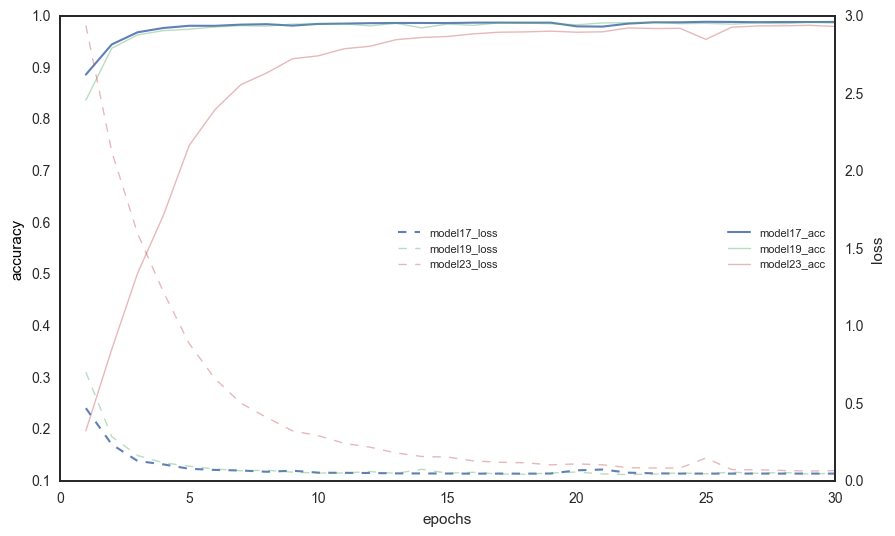

In [93]:
## plot of models 1 to 29
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

# add_model_to_plot(df_m12,12)
add_model_to_plot(df_m17.iloc[:],17, 0.9,1.5)
# add_model_to_plot(df_m1,1, 0.4,1)
# add_model_to_plot(df_m2,2, 0.4,1)
# add_model_to_plot(df_m3,3, 0.4,1)
# add_model_to_plot(df_m4,4, 0.4,1)
# add_model_to_plot(df_m5,5, 0.4,1)
# add_model_to_plot(df_m6,6, 0.4,1)
# add_model_to_plot(df_m7,7, 0.4,1)
# add_model_to_plot(df_m8,8, 0.4,1)
# add_model_to_plot(df_m9,9, 0.4,1)
# add_model_to_plot(df_m10,10, 0.4,1)
# add_model_to_plot(df_m11,11, 0.4,1)
# add_model_to_plot(df_m13,13, 0.4,1)
# add_model_to_plot(df_m14.iloc[:],14, 0.4,1)
# add_model_to_plot(df_m15.iloc[3:],15, 0.4,1)
# add_model_to_plot(df_m16.iloc[3:],16, 0.4,1)
# add_model_to_plot(df_m17.iloc[3:],17, 0.9,1.5)
# add_model_to_plot(df_m18.iloc[3:],18, 0.4,1)
add_model_to_plot(df_m19.iloc[:],19, 0.4,1)
# add_model_to_plot(df_m20.iloc[3:],20, 0.4,1)
# add_model_to_plot(df_m21.iloc[3:],21, 0.4,1)
# add_model_to_plot(df_m22.iloc[3:],22, 0.4,1)
add_model_to_plot(df_m23.iloc[:],23, 0.4,1)
# add_model_to_plot(df_m24.iloc[3:],24, 0.4,1)
# add_model_to_plot(df_m25.iloc[3:],25, 0.4,1)
# add_model_to_plot(df_m26,26)
# add_model_to_plot(df_m27,27)
# add_model_to_plot(df_m28,28)
# add_model_to_plot(df_m29,29)


# ESTHETICS
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy', color='k')
ax1.legend(loc='center right', fontsize=8)
ax2.set_ylabel('loss')
ax2.legend(loc='center', fontsize=8)
plt.show()

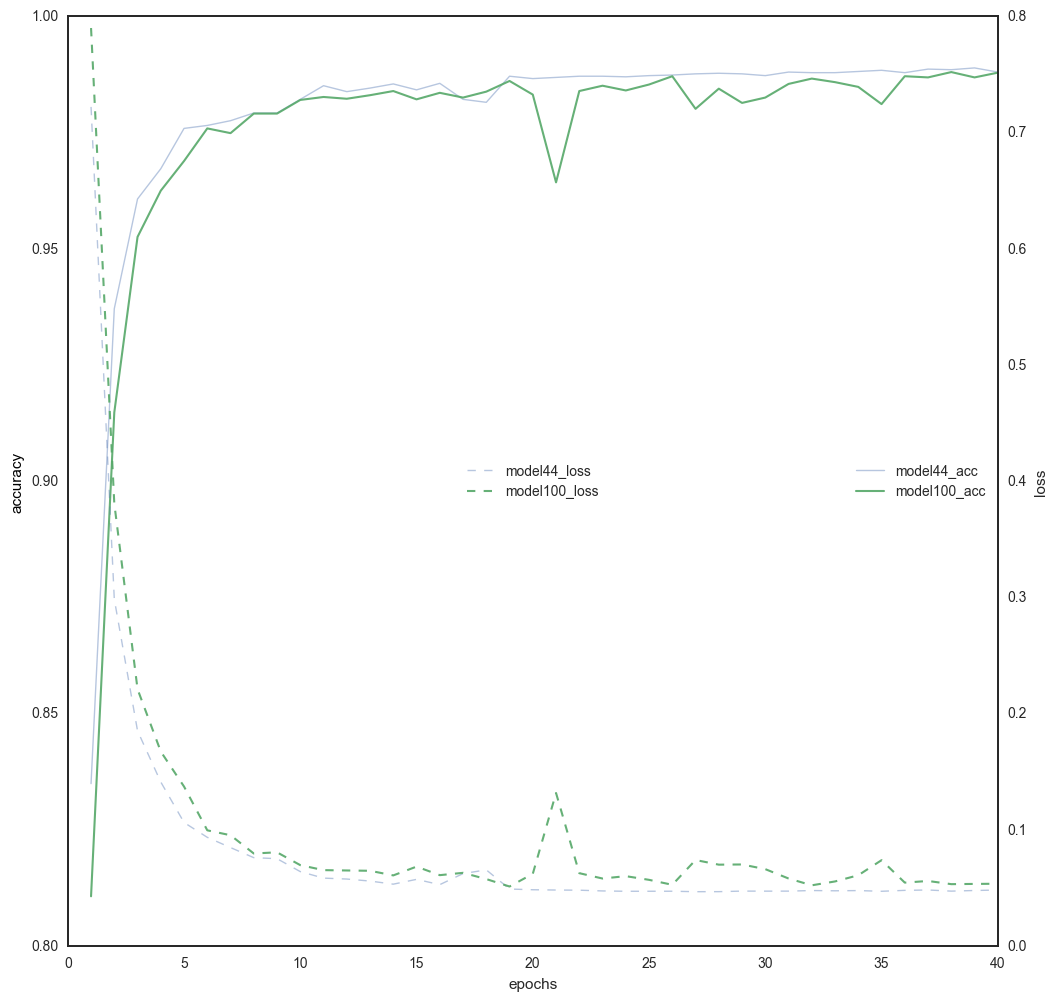

In [98]:
## plot of models 29 to 100
fig, ax1 = plt.subplots(figsize=(12,12))
ax2 = ax1.twinx()

# add_model_to_plot(df_m29,29)
# add_model_to_plot(df_m30.iloc[20:40],30)
# add_model_to_plot(df_m31.iloc[20:50],31)
# add_model_to_plot(df_m32.iloc[20:],32)
# add_model_to_plot(df_m33.iloc[20:50],33)
# add_model_to_plot(df_m34.iloc[20:50],34)
# add_model_to_plot(df_m35.iloc[5:40],35)
# add_model_to_plot(df_m36,36)
# add_model_to_plot(df_m37.iloc[20:40],37)
# add_model_to_plot(df_m38.iloc[:40],38)
# add_model_to_plot(df_m39,39)
# add_model_to_plot(df_m40,40)
# add_model_to_plot(df_m41,41)
# add_model_to_plot(df_m42,42)
# add_model_to_plot(df_m43.iloc[:40],43)
add_model_to_plot(df_m44.iloc[:40],44, 0.4,1)

add_model_to_plot(df_m100.iloc[:40],100)


# ESTHETICS
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy', color='k')
ax1.legend(loc='center right')
ax2.set_ylabel('loss')
ax2.legend(loc='center')
plt.show()